## Author: Morteza  Layegh Mirhosseini – student id: 220003166 


### Attribute Information:
Gender:  (Female, Male)

Customer Type: (Loyal customer, disloyal customer)

Age: Age of the passengers

Type of Travel: (personal Travel, Business Travel)

Class: (Business, Eco, Eco Plus)

Flight distance: Km

Inflight wifi service: (0: not rated; 1-5)

Departure/Arrival time convenient: (0: not rated; 1-5)

Ease of Online booking: (0: not rated; 1-5)

Gate location: (0: not rated; 1-5)

Food and drink: (0: not rated; 1-5)

Online boarding: (0: not rated; 1-5)

Seat comfort: (0: not rated; 1-5)

Inflight entertainment: (0: not rated; 1-5)

On-board service: (0: not rated; 1-5)

Leg room service: (0: not rated; 1-5)

Baggage handling: (0: not rated; 1-5)

Check-in service: (0: not rated; 1-5)

Inflight service: (0: not rated; 1-5)

Cleanliness: (0: not rated; 1-5)

Departure Delay in Minutes: Minutes

Arrival Delay in Minutes: Minutes

## Label:

Satisfaction: (satisffied or nuetral/dissatisfied)

### Link of Dataset:
[click](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

# Research Questions
The aviation industry is a multi-billion dollar [5] and highly competitive industry. A comprehensive analysis of a customer satisfaction survey could help an airline to detect its weak spots in terms of services. Such analysis also allows for the investigation of the socio-economic characteristics and demographics of the airline's customers. With this knowledge, airlines can allocate well-targeted resources to improve key services, gaining an advantage and ultimately leading to more satisfied passengers.
With a focus on analyzing an unknown airline survey, this research aims to answer the following questions:
1.	Which groups of passengers do not have a pleasant experience with the airline in general?
2.	What are the most important airline services regarding the satisfaction rate of passengers?
3.	What is the optimum strategy to improve services in order to increase the satisfaction rate?



## Importing important libraries 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder


## Loading Data 

In [324]:
#load data
df = pd.read_csv('data.csv')


<br>

## Our first look to the dataset  
### Printing the first lines

In [325]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<br>

- The satisfaction column is our labal feature containing two values(satisfied, nutural/dissatisfied) 
- the id column is too cryptic. i do not believe we can extract meaning full information from it 
<br>

##  Statistical Report of Numeric and Categorical Features


In [326]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### our data has 25 columns and 103904 entries.
- 20 features are integer or floats.
- 5 features are strings (object).
<br>

### Dropping the 0 and ID columns since they are irrelevat. 

In [327]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('id', axis=1, inplace=True)

the dataset contains 15 features on an ordinal scale that relate to different services of the airline. Each passenger has rated each of these services from 0 to 5. We have to be careful not to be misled by the integer values of these service features. In fact, features which are on an ordinal scale, i.e. ratings from 1 to 5, are not numerical variables. They are actually qualitative features characterized by ordered categorical responses [1]. Therefore, we will treat the service features as ordinal qualitative data. These features will provide information to answer our second research question.

In [328]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')

In [329]:
df.describe(include='category').transpose()

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
Inflight wifi service,103904,6,3,25868
Departure/Arrival time convenient,103904,6,4,25546
Ease of Online booking,103904,6,3,24449
Gate location,103904,6,3,28577
Food and drink,103904,6,4,24359
Online boarding,103904,6,4,30762


- Customer Type contains different two values which are loyas and disloyal.
- most of the custumer in our data set are loyal customers.
- Type of Travel contains different two values which are Personal Travel, Business Travel.
- Class contains different two values which are business, Eco and Eco Plu.
- most of the passengers in our data set travel for Business reasons and use Business Class.
<br><br>

In [330]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0


<br>

- the id feature show that all of our samples are unique value ( id count = number of rows)
- the first two column are irrelavat, so we will drop them 
- the average age of passangers is 39 years old. the age range is between 7 to 85 years old.
- some service features have the value 'zero' which is irrelavant and needs to be deal with.
- 75% of all passengers are aged less than 51 years old. 
- the only feature that has Null values is 'Arrivall Delay in Minutes
- 50% of passangers experience no departure delay and no arrival delay.
<br><br>


<br><br>

In [331]:
#replacing label values with binary values
#satisfied = 1
#neutral or dissatisfied = 0 

# df.replace(to_replace ='satisfied', value = 1, inplace=True)
df.replace(to_replace='neutral or dissatisfied', value= "dissatisfied", inplace=True)

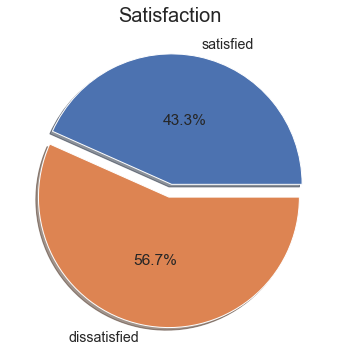

In [332]:
labels = ['satisfied', 'dissatisfied']
data = [df['satisfaction'].value_counts()[1],
         df['satisfaction'].value_counts()[0]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Satisfaction", fontsize=20);
plt.show()

looking at the the above bar graph, we can see that the data is fairy balanced regarding statisfaction feature. Therefore, we can assume that there is no need to balance our data.

# Our overall understandig of the data set.
The dataset contains 103904 rows and 25 columns. Each row corresponds to one passenger, and each column to a specific feature.
Table I. shows the different features in our data set and the corresponding values. Our dataset contains six features that allow us to group dissatisfied and satisfied passengers based on their gender, age, flight class, type of travel, flight distance and type of customer. These features will allow us to identify the demographic or socio-economic characteristic of the passengers. We use these features to answer the first research question. 

Furthermore, the dataset contains 15 features on an ordinal scale that relate to different services of the airline. Each passenger has rated each of these services from 0 to 5. We have to be careful not to be misled by the integer values of these service features. In fact, features which are on an ordinal scale, i.e. ratings from 1 to 5, are not numerical variables. They are actually qualitative features characterized by ordered categorical responses [1]. Therefore, we will treat the service features as ordinal qualitative data. These features will provide information to answer our second research question. 

The final column we have is the satisfaction feature, which indicates whether each passenger was neutral/disatisfied or satisfied with their flight.  Base on this feature , the proportion of people who were satisfied with their flight is 44%, while the proportion of those who were neutral or dissatisfied is 56% (Fig.1). This feature is our target label and helps us answer our third question. For the sake of simplicity, we will assume that passengers who are neutral/dissatisfied with the service are dissatisfied overall. 


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

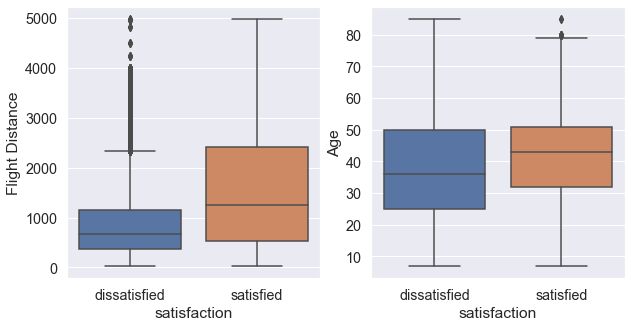

In [334]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(x="satisfaction", y="Flight Distance", data=df,ax=ax[0])
sns.boxplot(x="satisfaction", y="Age", data=df,ax=ax[1])

# Frequency Distributions 

<function matplotlib.pyplot.show(close=None, block=None)>

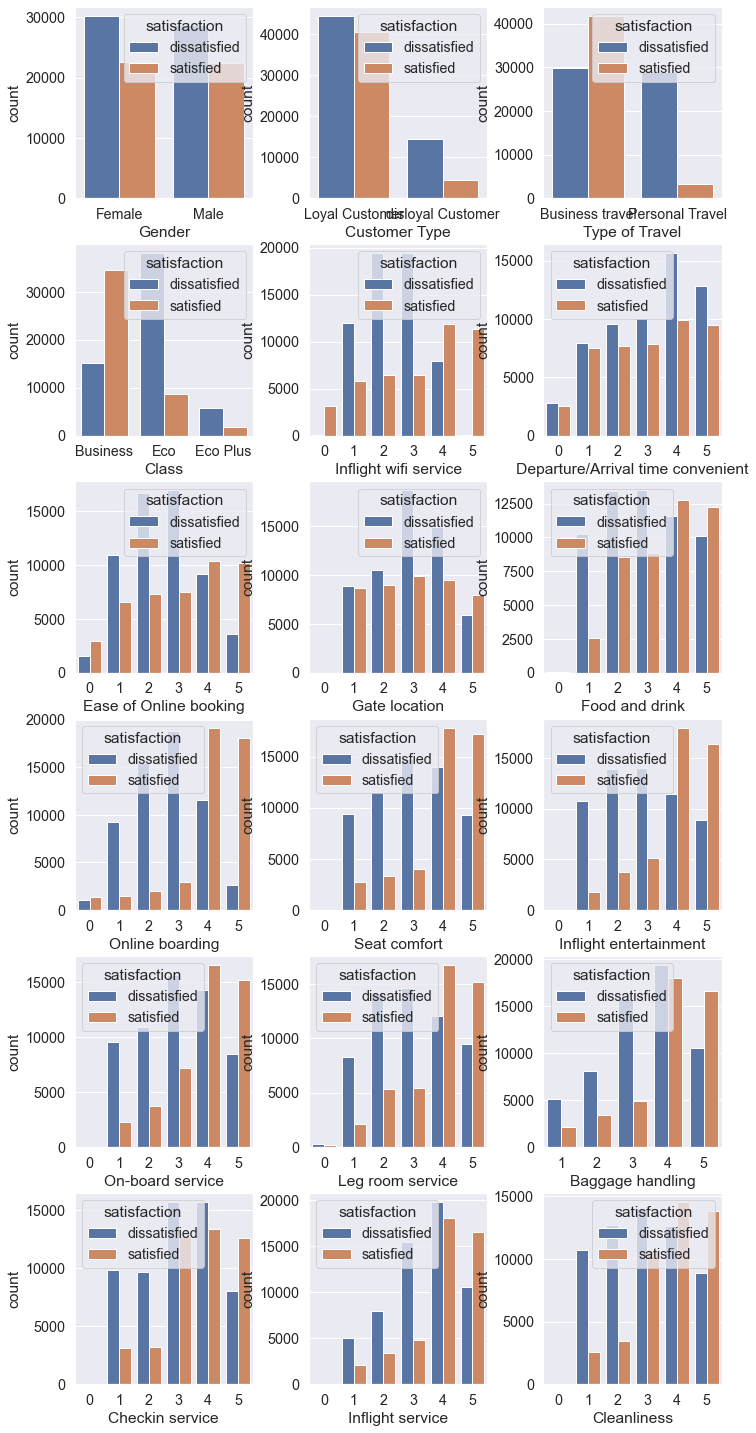

In [335]:
fig, ax = plt.subplots(6,3, figsize = (10,20))
fig.tight_layout()
k = 0
for i in range(6):
    for j in range(3):
        sns.countplot(x = df.columns[categorical_indexes[k]], hue = 'satisfaction', data = df,ax=ax[i,j])
        k = k+1
plt.show

# Correlation Matrix


<AxesSubplot:>

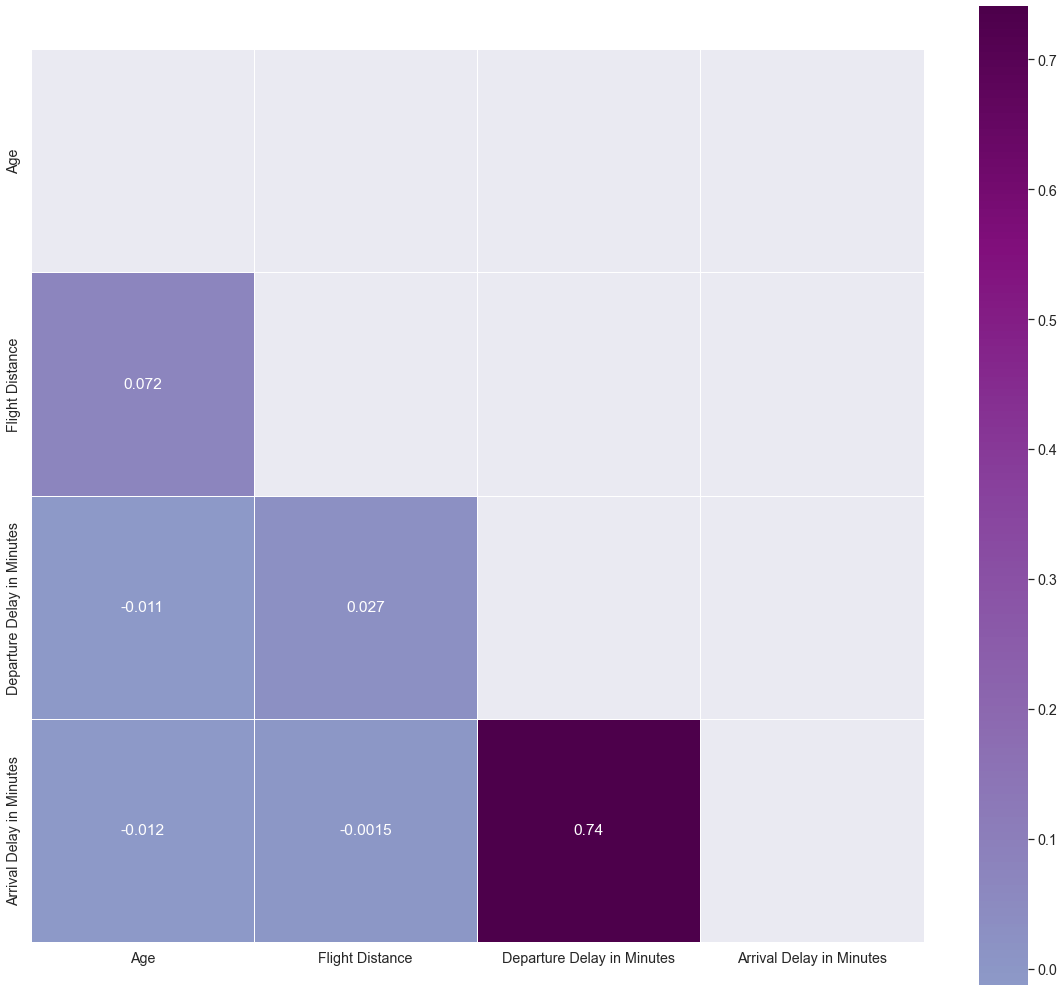

In [336]:
#correlation matrix

corr = df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="BuPu", center=0,
            square=True, linewidths=.5)

Departure delay in minutes and arrival delay in minutes have the strongest correlation with each other compare to any other correlation value in the heatmap (0.74).This makes sense, as those flights with departure delay would probably have arrival delay with the assumption that the pilot would not increase the speed for departure delay.

<br><br>


# Finding an answer for the first research question

To find the dissatisfaction rate of different groups of passengers, we can use contingency tables. The rows and columns of these table correspond to the different categorical values of the features, and the cells contain the frequency with which each combination of values occurs in the data[2]. We used contingency tables by creating a function using pandas crosstab and Matplotlib to plot 100% stacked bar charts[3]. This function receives a dataset and a feature, such as age_group, as arguments and returns a stack bar chart that shows us the satisfaction rate for different values of a  feature.

[code credit ](https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b)


In [337]:
def analysis(df,feature):
    
    cross_tab = pd.crosstab(index=df[feature],
                        columns=df['satisfaction'])
    
    cross_tab_prop = pd.crosstab(index=df[feature],
                             columns=df['satisfaction'],
                             normalize="index")
    cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

    plt.legend(loc="lower left", ncol=2)
    plt.xlabel(feature,fontsize=16)
    plt.ylabel("Proportion")


    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                              cross_tab.loc[x],
                                              cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                     color="black",
                     fontsize=16,
                     fontweight="bold")

    plt.show()
    
# code credit : https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

In [281]:
def pieAnalysis (df,feature):
    labels = [list(df[feature].unique())[1],
              list(df[feature].unique())[0]]
    data1 = [df[feature].value_counts()[1],
          df[feature].value_counts()[0]]

    fig1, ax1 = plt.subplots(figsize=[15,6])
    ax1.pie(data1, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
    plt.title("Satisfaction", fontsize=20);
    plt.show()


# Customer Type (loyal, disloyal)

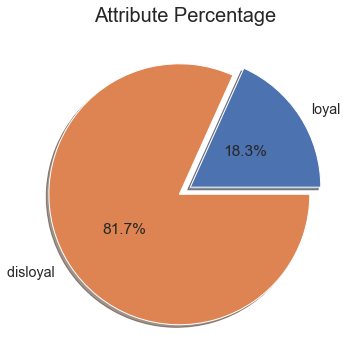

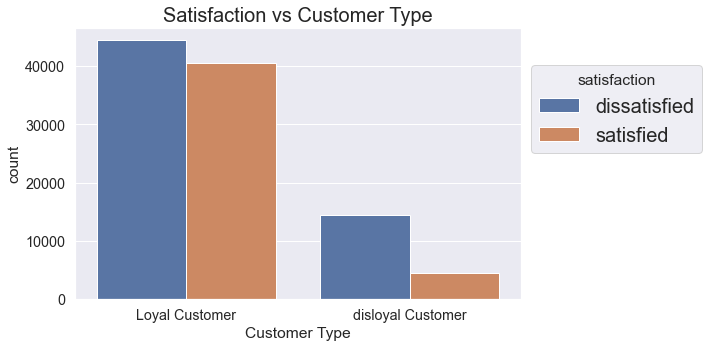

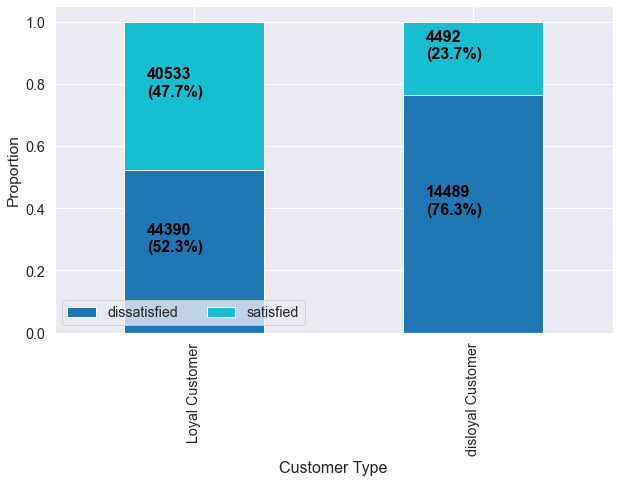

In [282]:

#pie chart
labels = ['loyal', 'disloyal ']
data1 = [df['Customer Type'].value_counts()[1],
         df['Customer Type'].value_counts()[0]]

fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data1, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title('Attribute Percentage', fontsize=20);
plt.show()

# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = df, hue ="satisfaction" )
plt.title("Satisfaction vs Customer Type", fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1,0.7),  title = "satisfaction",fontsize=20)
plt.show()


#stack barchart
analysis(df,'Customer Type')

As shown in the above plot, for both loyal and disloyal customers, the number of dissatisfied people is greater than the number of satisfied customers. Additionally, the pie chart shows that 81% of passengers are loyal customers. Importantly, more than 50% of these loyal customers, who are typically more flexible in their preferences for services, are dissatisfied.

# Gender 

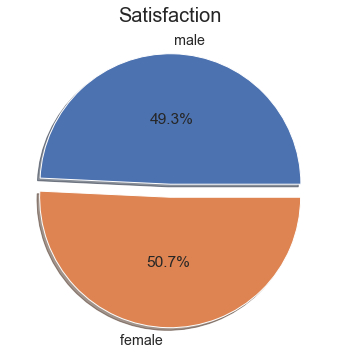

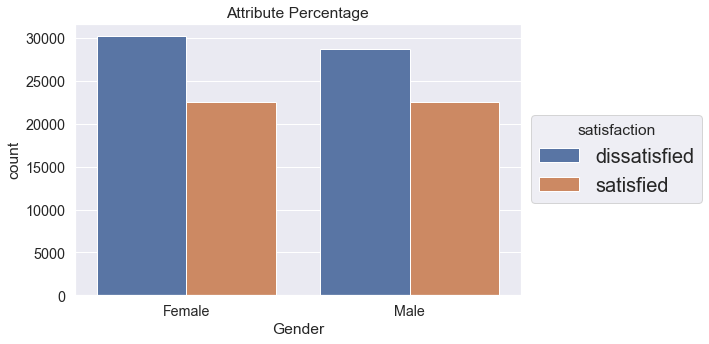

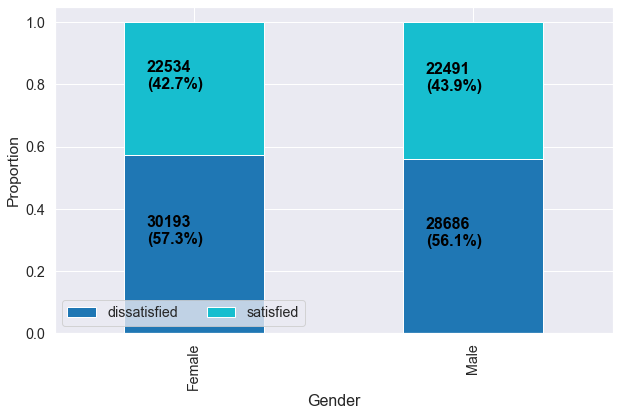

In [283]:
#pie chart
labels = ['male', 'female ']
data1 = [df['Gender'].value_counts()[1],
         df['Gender'].value_counts()[0]]

fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data1, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Satisfaction", fontsize=20);
plt.show()


# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction" )
plt.title("Attribute Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title = "satisfaction",fontsize=20)
plt.show()
analysis(df,'Gender')

As highlighted in the above bar plot, both males and females are dissatisfied at approximately the same rate (56%). Since the proportion of males and females is also the same in our data set, we cannot derive any important analysis from the 'Gender' attribute. This means we can eliminate this feature from our machine learning algorithm in order to reduce computational costs.

# Age

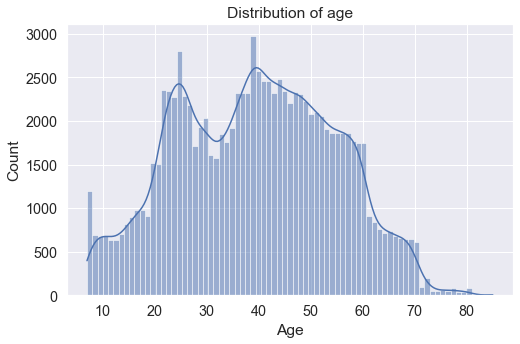

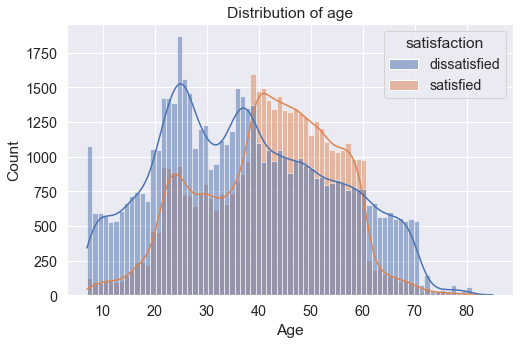

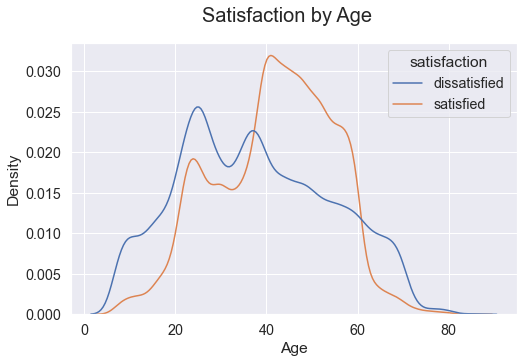

In [285]:

# # create graph
plt.figure(figsize = (8,5))
sns.histplot( x= "Age", data = df, kde= True)
plt.title("Distribution of age")
plt.show()


# create graph
plt.figure(figsize = (8,5))
sns.histplot( x= "Age", data = df,hue='satisfaction', kde= True)
plt.title("Distribution of age")
plt.show()

# # create graph
plt.figure(figsize = (8,5))
sns.kdeplot(data = df, x= "Age", hue = "satisfaction", common_norm = False)
plt.suptitle("Satisfaction by Age", fontsize = 20,)
plt.show()

The average age of customers is approximately 39 years old. There are two peaks in the customer age distribution: the first peak is related to those who are in their early twenties (aged between 20 and 26), and the second peak is related to those who are in their late thirties and early forties (aged between 37 and 42). Overall, we can say that most of the customers are aged between 20 and 60 years old.

To answer our first research question, we need to calculate the dissatisfaction rate for the different demographic features. To do this, we will first need to derive new features from the age and flight distance data, as there are too few samples for each age calculate the dissatisfaction rate for each individual value. It would not be meaningful to calculate the dissatisfaction rate for each age individually[4].

In order to better understand the relationship between age and dissatisfaction with airline service, we propose creating a new feature called "age_group." Using the thresholds derived from the KDE distribution curves, we will categorize passengers into three age groups: young (less than 40), middle-aged (between 40 and 60), and senior (more than 60). This will allow us to identify which age group has the highest rate of dissatisfaction with airline service. 



In [339]:
def age_group (row): 
    if row <40:
        return 'Young'
    if (row>=40) & (row<60):
        return "Middle Age"
    if row >=60:
        return "Senior"
    else:
        return "no age"
    
df["Age_group"] = df["Age"].apply(lambda row: age_group(row))

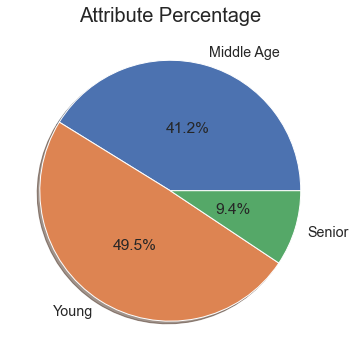

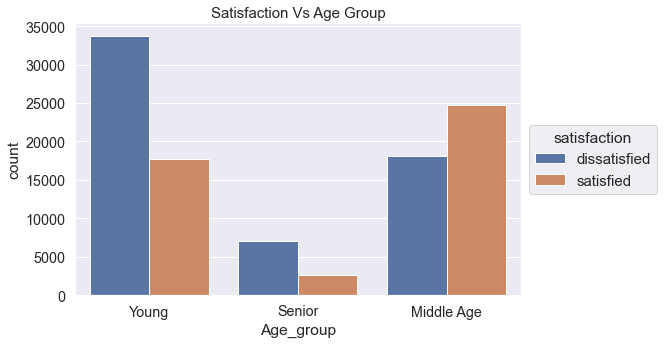

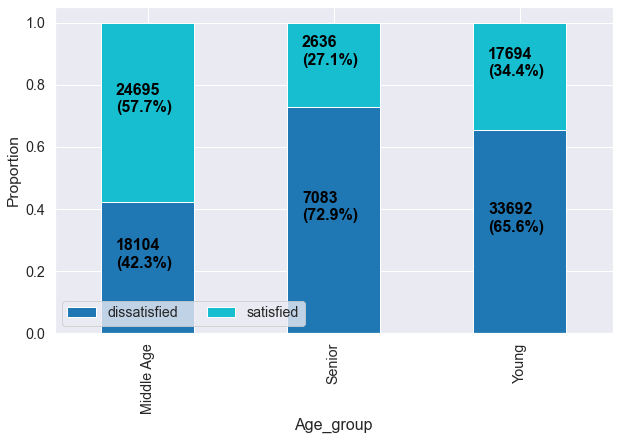

In [340]:
#pie chart
labels = ['Middle Age ','Young','Senior']
data1 = [df['Age_group'].value_counts()[1],
         df['Age_group'].value_counts()[0],
         df['Age_group'].value_counts()[2]]

fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data1, labels=labels, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Attribute Percentage", fontsize=20);
plt.show()

# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Age_group", data = df, hue ="satisfaction" )

plt.title("Satisfaction Vs Age Group",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction",fontsize=15)

plt.show()

#stacked bar chart
analysis(df,'Age_group')

The only age group with a satisfaction rate of more than 50% is the middle age group. It is possible that this group of people generally belongs to the high socio-economic class, and therefore can afford business class, which might explain why they are more likely to be satisfied with their flight. When looking at the senior age group, we can see that nearly 73 percent of senior customers do not have a desirable experience on the flight. However, the size of this age group is small compared to other age groups, so it may be more important for the airline to focus on the other age groups with more dissatisfied passengers. Approximately 66 percent of young people are dissatisfied with the service, which raises the question of why this group of people does not have a good experience with airlines. Since the young age group accounts for nearly 50 percent of the customers, the airline should find an answer to this question and take action to improve their satisfaction,

# Type of Travel


Personal travels are accounted for nearly one-third of our dataset, but nearly 70% of passengers are traveling for business reasons. The second figure shows a significant difference in satisfaction rates between the two groups. Nearly 90% of those who traveled for personal reasons are dissatisfied with the service, whereas only 58% of those who traveled for business are dissatisfied. This suggests that the allocation of airline resources may be prioritizing the provision of a better service for business travelers

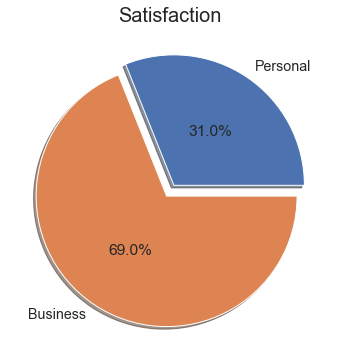

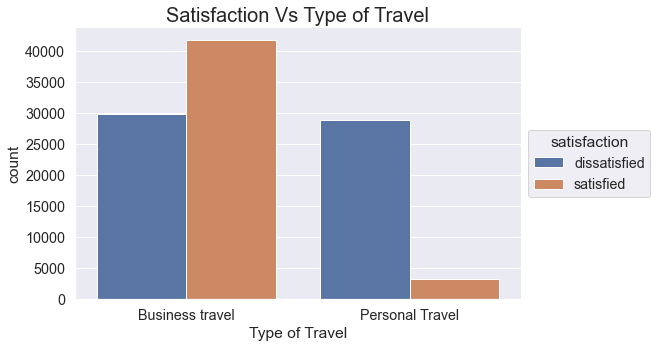

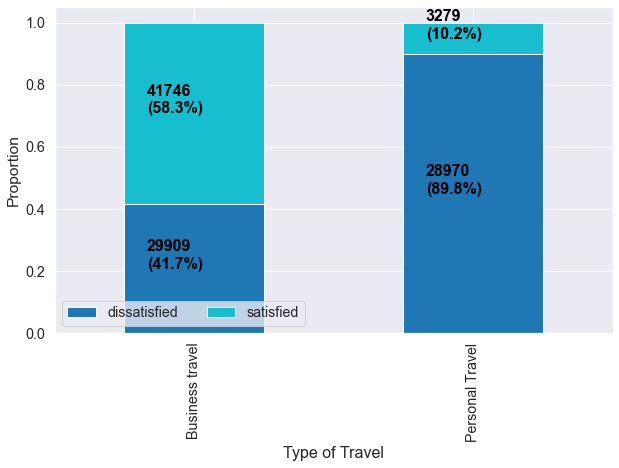

In [288]:
#pie chart
labels = ['Personal','Business']
data1 = [df['Type of Travel'].value_counts()[1],
         df['Type of Travel'].value_counts()[0]]

fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data1, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Satisfaction", fontsize=20);
plt.show()


# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Type of Travel", data = df, hue ="satisfaction" )
plt.title("Satisfaction Vs Type of Travel",fontsize=20)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()
analysis(df,'Type of Travel')

# Flight Class 

The airline offers three classes: Eco Plus, Business Class, and Eco. Our analysis shows that only in Business Class do most people find the service desirable. On the other hand, a significant percentage of people who choose Eco and Eco Plus are dissatisfied with the service quality, 81% and 75% respectively. These numbers suggest that the airline is only focused on offering good services in Business Class. This may be justified, as nearly half of the passengers choose Business Class. However, the dissatisfaction rate related to the Eco class is concerning (81%). Nearly 45% of passengers use this class, so it would be worthwhile to investigate the reasons for dissatisfaction with this class and develop strategies to improve the service in this class.

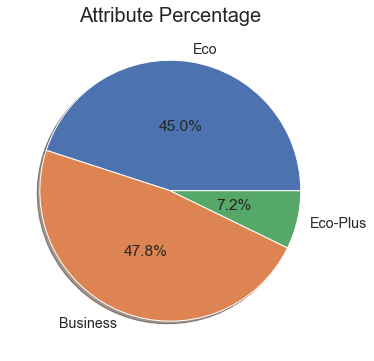

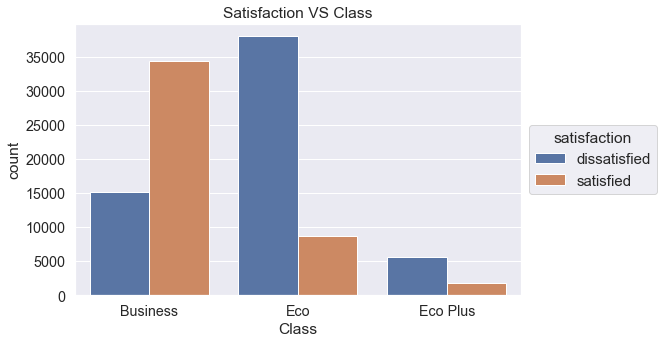

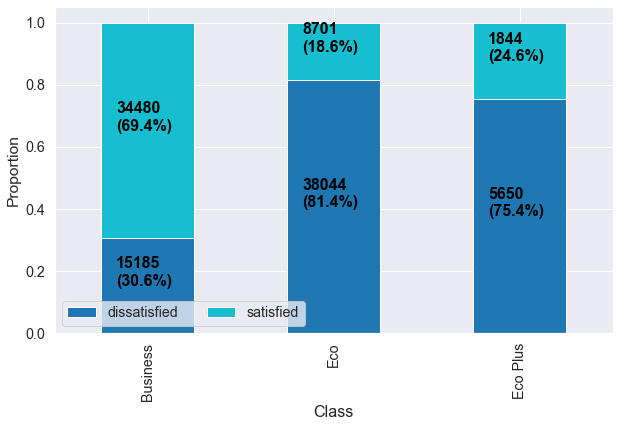

In [289]:
#pie chart
labels = ['Eco','Business','Eco-Plus']
data1 = [df['Class'].value_counts()[1],
         df['Class'].value_counts()[0],
         df['Class'].value_counts()[2]]

fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data1, labels=labels, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Attribute Percentage", fontsize=20);
plt.show()


# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Class", data = df, hue ="satisfaction" )
plt.title("Satisfaction VS Class")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction",fontsize=15)
plt.show()

analysis(df,'Class')

# Travel Distance 
we propose creating another feature called "distance_group" using the KDE distribution curve shown in Figures. We categorize passengers into two groups: those who traveled less than 1500 kilometers and those who traveled more than 1500 kilometers.

Figures indicate that the airline has a lower satisfaction rate for flights with distances shorter than 1500 km. Since nearly 70% of the airline's flights are in this category, it is important to investigate the reasons for dissatisfaction in this group.


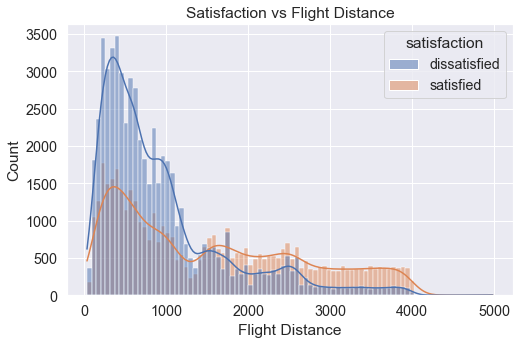

In [219]:
# create graph
plt.figure(figsize = (8,5))
sns.histplot( x= "Flight Distance", data = df,hue='satisfaction', kde= True)

# format graph
plt.title("Satisfaction vs Flight Distance")
plt.show()



In [300]:
def distance_group (row): 
    if row <= 1500: 
        return "less than 1500"
    else:
        return "more than 1500"
    
df["distance_group"] = df["Flight Distance"].apply(lambda row: distance_group(row))

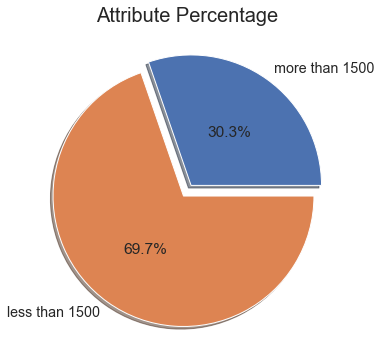

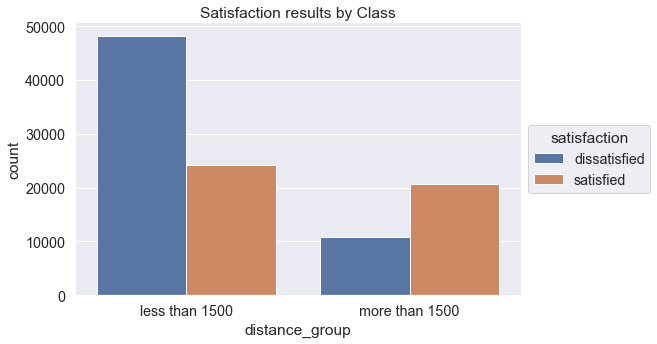

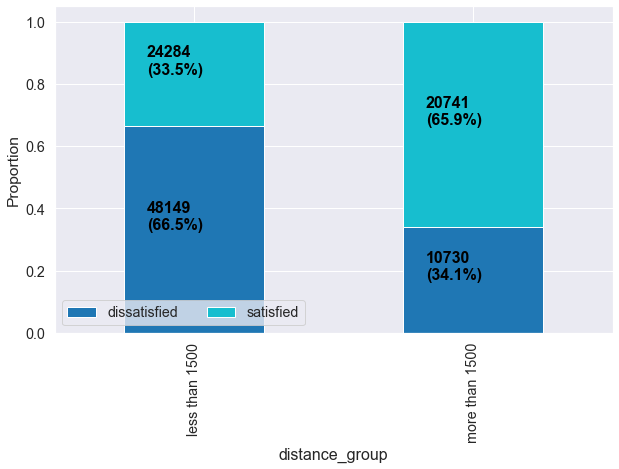

In [301]:
#pie chart
labels = ['more than 1500','less than 1500']
data1 = [df['distance_group'].value_counts()[1],
         df['distance_group'].value_counts()[0]]

fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data1, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Attribute Percentage", fontsize=20);
plt.show()

# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="distance_group", data = df, hue ="satisfaction")
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.show()
# bar chart
analysis(df,'distance_group')

# Answer for our first research question

According to our information, the following groups of passengers are dissatisfied:
-	66% of passengers aged younger than 40 (young category) - this group accounts for 50% of passengers
-	90% of passengers who traveled for personal reasons - this group accounts for 31% of passengers
-	81% of passengers who traveled with Eco class flights - this group accounts for 31% of passengers
-	66% of those who traveled less than 1500 km - this group accounts for 70% of passengers
These numbers answer our first research question, which was what are the groups of passengers with the highest dissatisfaction rates. 



# creating subsets of data 

In [222]:
# create subset of dataset for personal travel and business
personal = df[df["Type of Travel"]=="Personal Travel"]
business =df[df["Type of Travel"]=="Business travel"]

# create subset of dataset for young(younger than 40) and middleage
young = df[df["Age_group"]=="Young"]
middleAge =df[df["Age_group"]=="Middle Age"]

# create subset of dataset for different flight classes 
eco_class = df[df["Class"]=="Eco"]
business_class = df[df["Class"]=="Business"]

# create subset of dataset for different flight distances 
less1500 = df[df["distance_group"]=="less than 1500"]
more1500 = df[df["distance_group"]=="more than 1500"]

# Finding an answer for the second research question

# Services

Since each service feature has values in ordinal scales, we cannot use statistical methods which are common for analyzing numerical data[1]. Therefore, we calculated frequency distribution and satisfaction rate for service features regarding each point of the ordinal scale (1 to 5). To make this calculation, we used the same function in the first question.

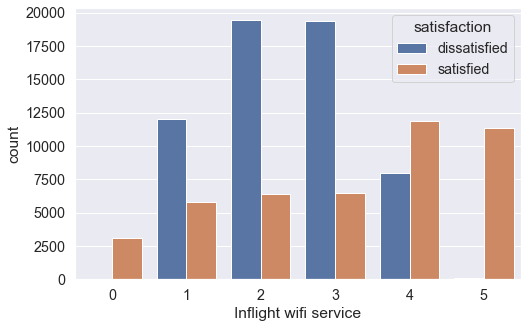

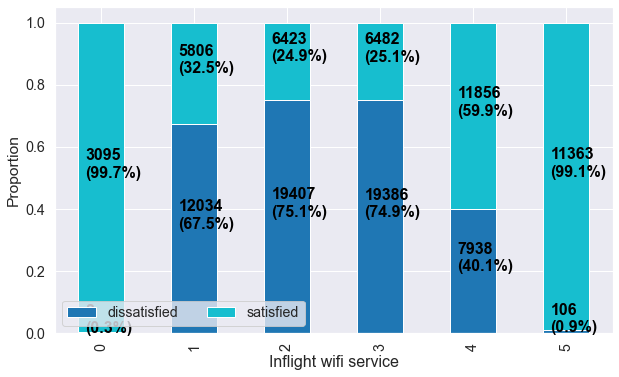

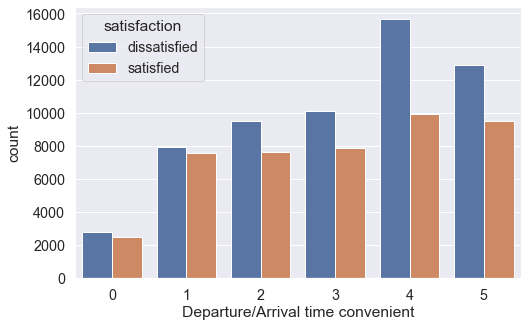

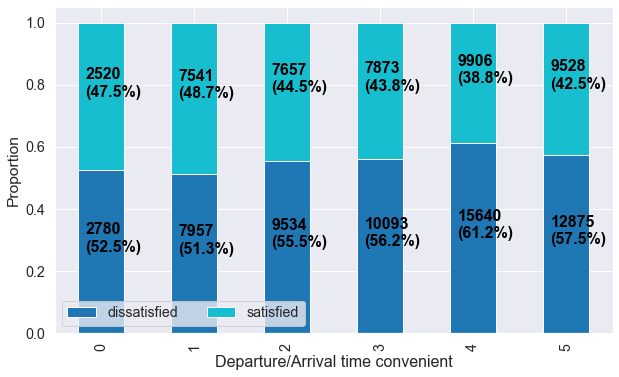

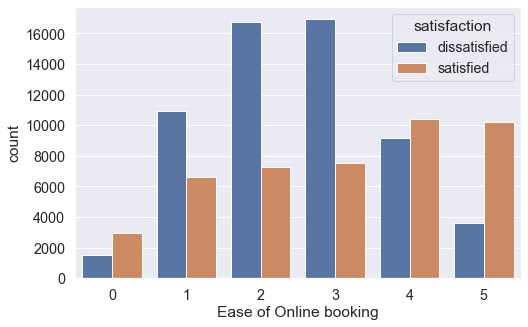

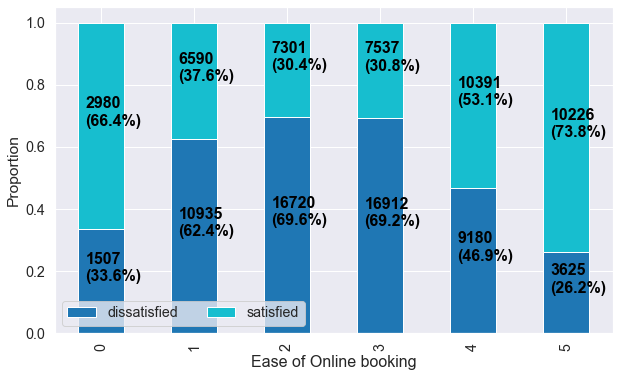

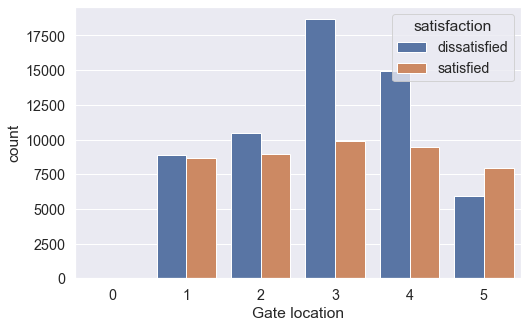

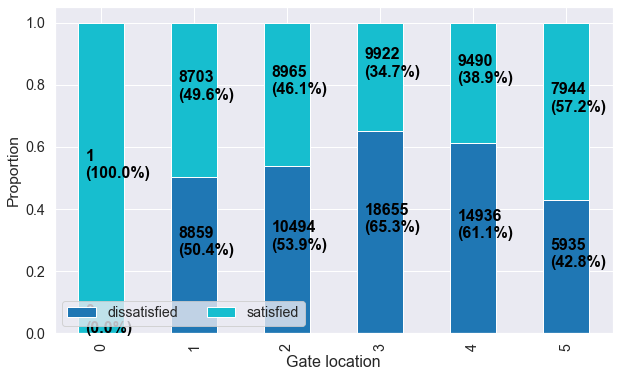

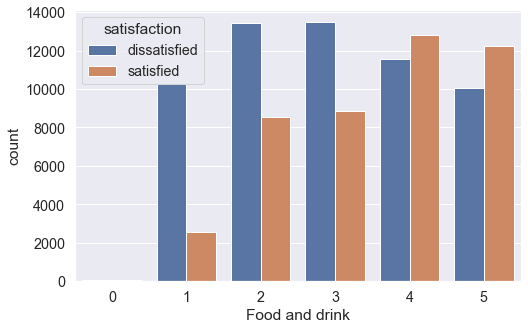

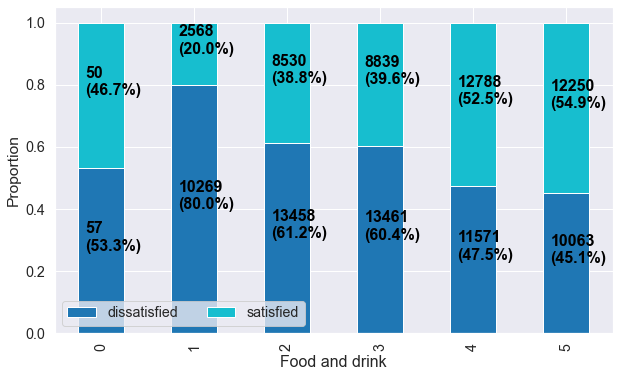

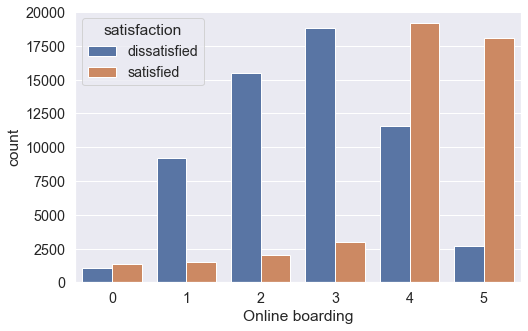

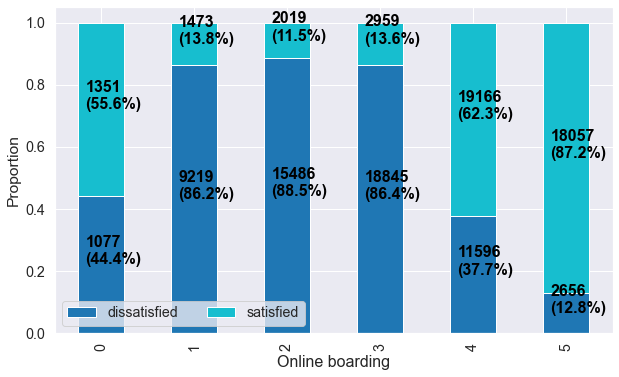

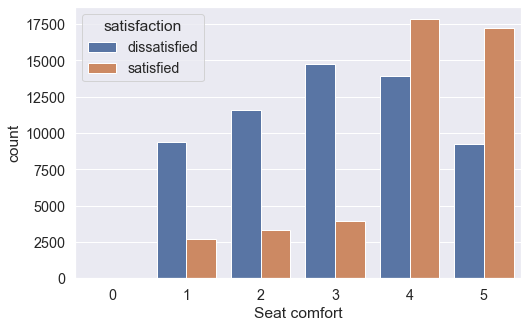

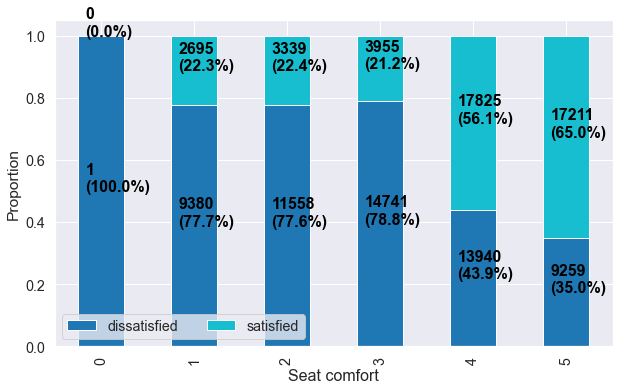

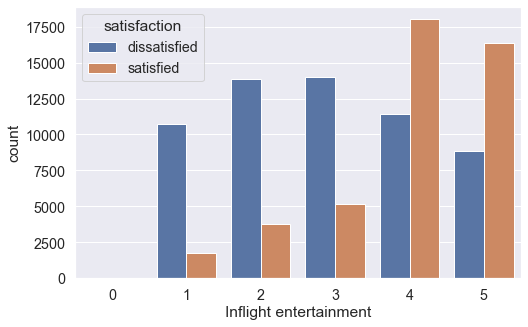

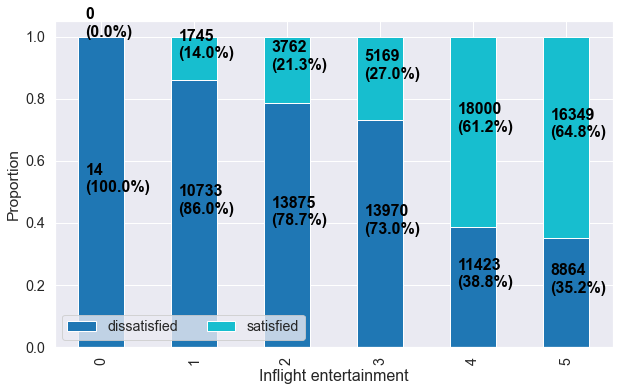

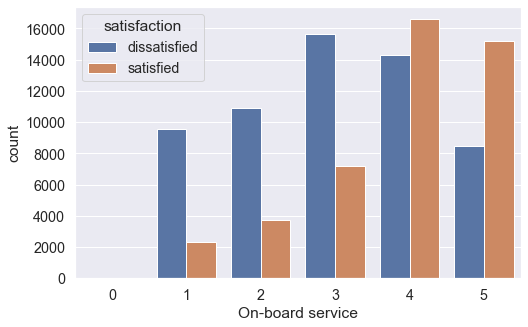

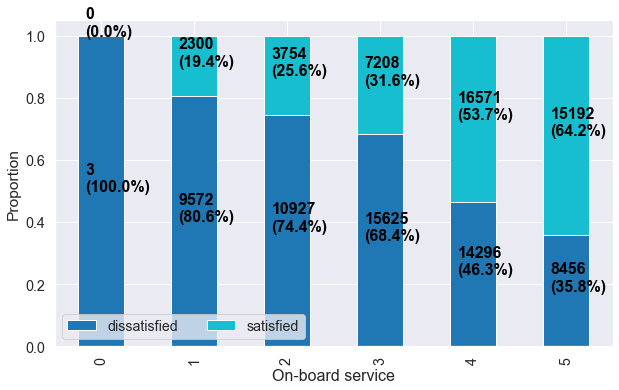

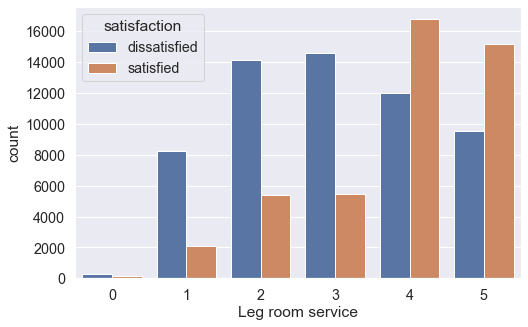

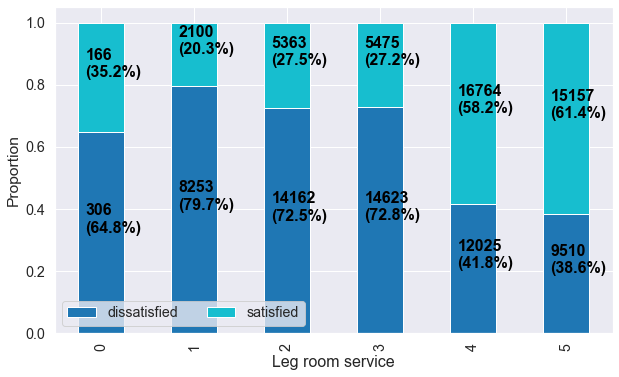

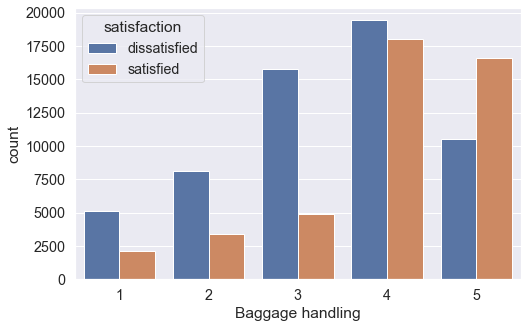

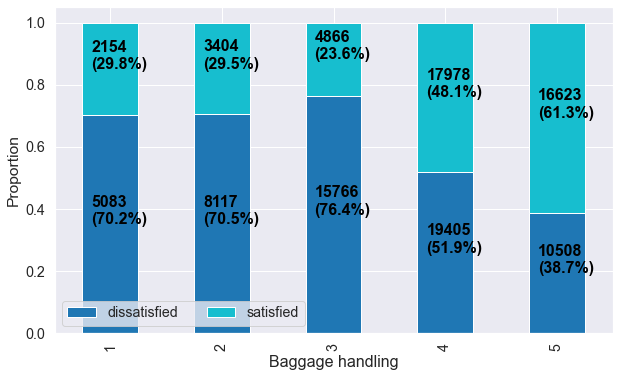

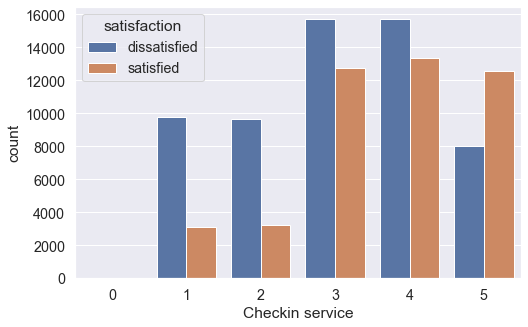

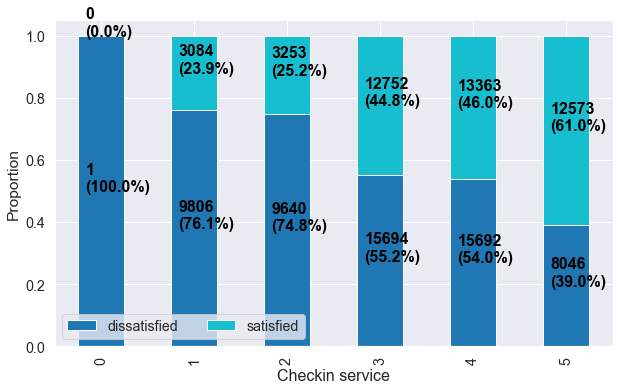

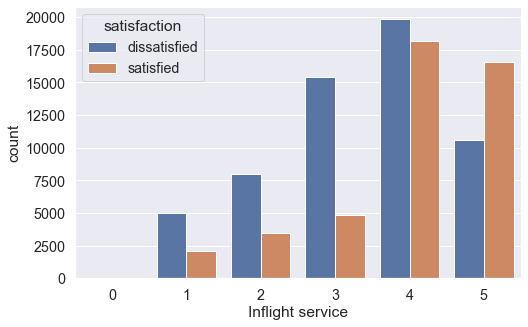

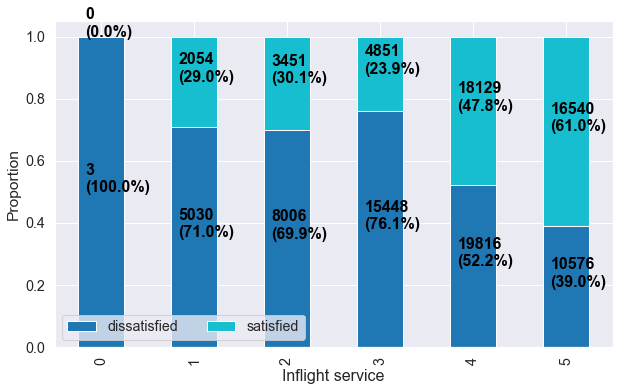

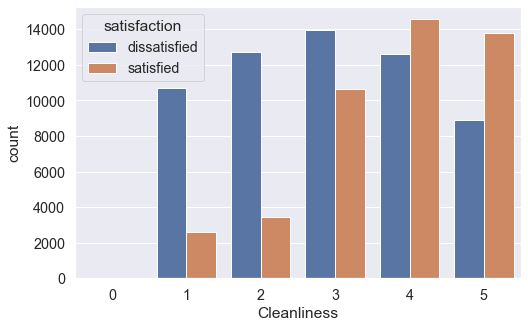

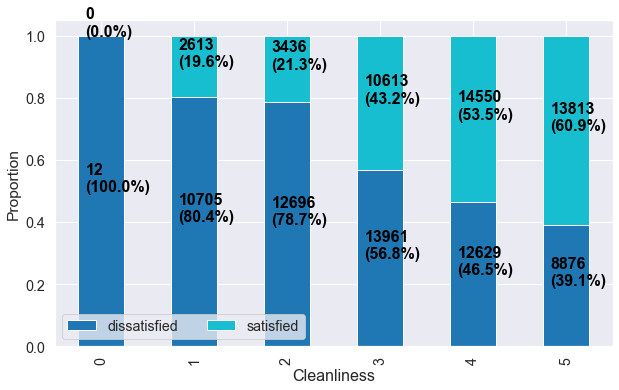

In [342]:
service_col =['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in service_col: 
    plt.figure(figsize = (8,5))
    sns.countplot(x =i, data = df, hue ="satisfaction")
    plt.show()
    analysis(df,i)

# Answer for our second research question
After plotting the dissatisfaction rate for each ordinal rating value of all service features(all figures are not included in the paper), we used a visual analytics approach to identify the most important features in terms of satisfaction rate. We looked for the service features in which the dissatisfaction rate showed the biggest drop as the rating increased from 1 to 5. This approach allowed us to identify the following service features as those that had the greatest potential to improve customer satisfaction.
-	Online boarding 
-	WIFI:
-	Inflight Entertainment


# Online Boarding 

Those who rated this service 1, 2, or 3 have a satisfaction rate of approximately 14%, 12%, and 14% respectively. However, as the rating increases to 4 and 5, we can see a dramatic increase (nearly 50% and 75%, respectively) in the satisfaction rate. This indicates that online boarding seems to be a very important determinant of customer satisfaction.

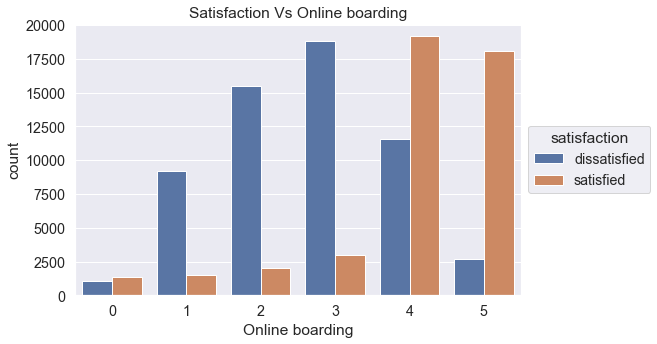

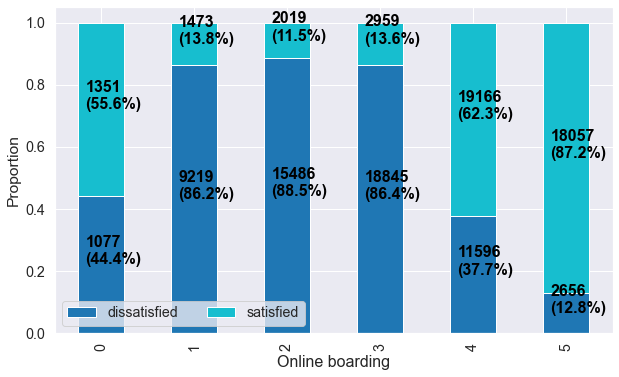

<AxesSubplot:>

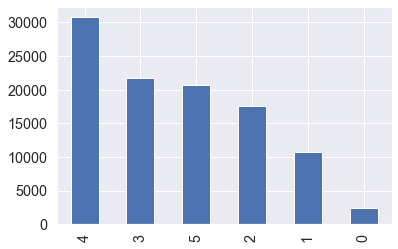

In [304]:


# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Online boarding", data = df, hue ="satisfaction")

# format graph
plt.title("Satisfaction Vs Online boarding")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

#dissatisfied rate
analysis(df,'Online boarding')
# bar plot
df['Online boarding'].value_counts().plot(kind='bar')

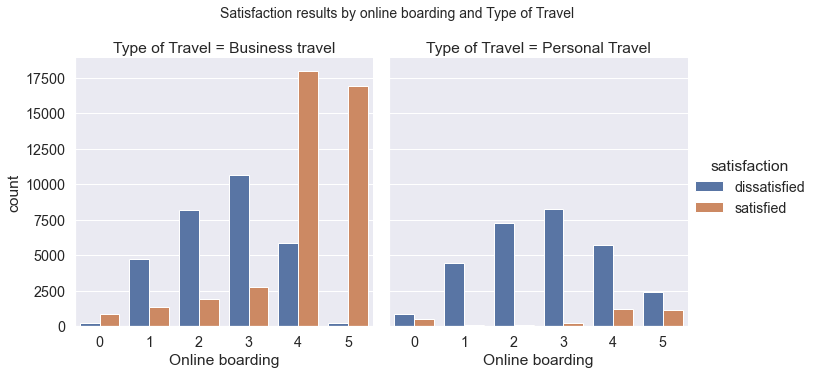

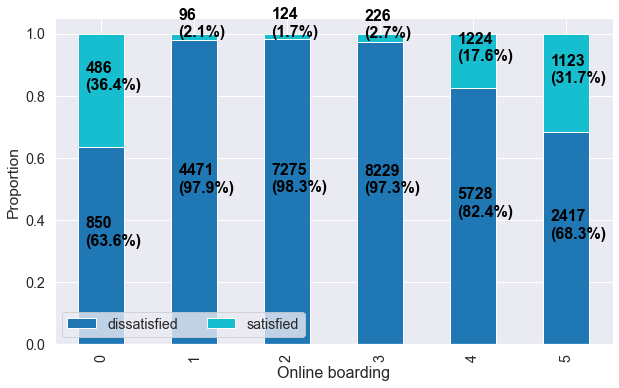

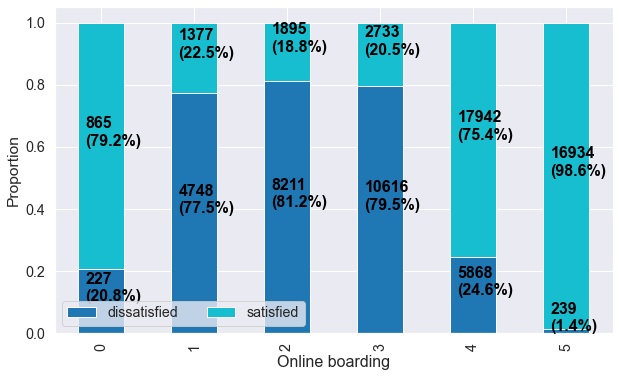

In [305]:


# create graph
sns.catplot( x ="Online boarding", hue ="satisfaction", kind = "count", col = "Type of Travel", 
            data = df)

# format graph
plt.suptitle("Satisfaction results by online boarding and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

analysis(personal,'Online boarding')
analysis(business,'Online boarding')

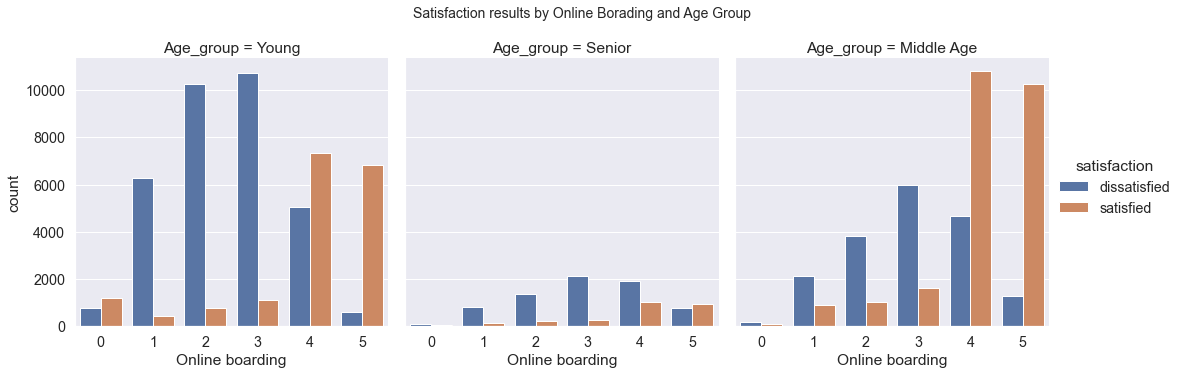

In [306]:
# create graph
sns.catplot( x ="Online boarding", hue ="satisfaction", kind = "count", col = "Age_group", 
            data = df)

# format graph
plt.suptitle("Satisfaction results by Online Borading and Age Group", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()



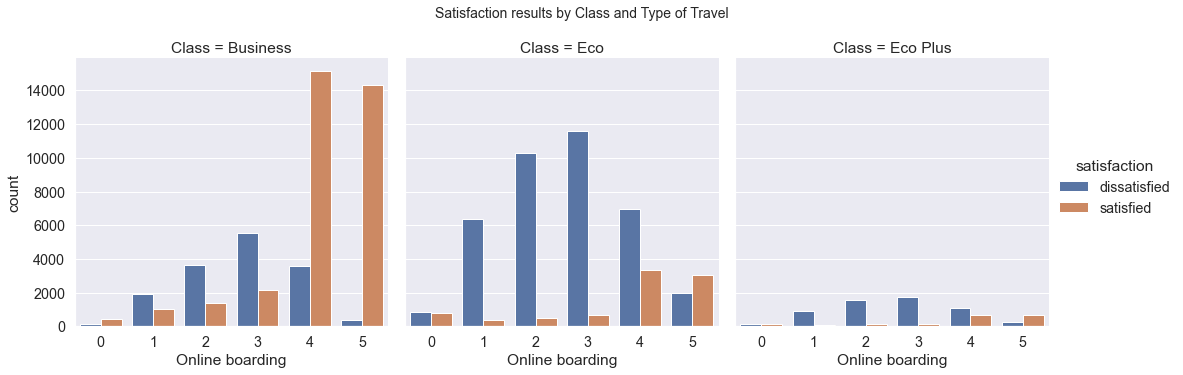

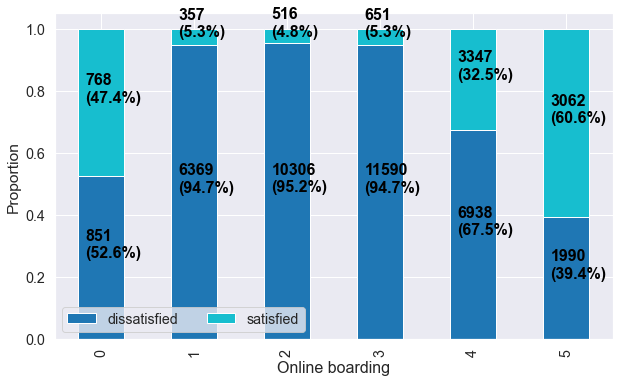

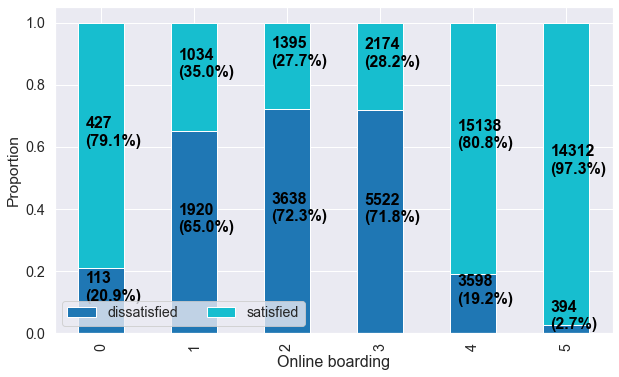

In [307]:
# create graph
sns.catplot( x ="Online boarding", hue ="satisfaction", kind = "count", col = "Class", 
            data = df)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()


        
analysis(eco_class,'Online boarding')
analysis(business_class,'Online boarding')






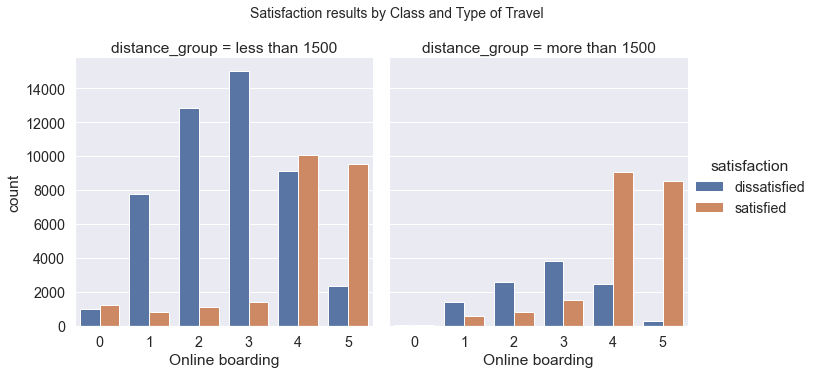

In [308]:
# create graph
sns.catplot( x ="Online boarding", hue ="satisfaction", kind = "count", col = "distance_group", 
            data = df)

# format graph
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

# WIFI

 Those who rated the Wi-Fi service 1, 2, and 3 have a low satisfaction rate (between 20% to 30%). However, the satisfaction rate increases as customers rate the Wi-Fi service higher than 3. This suggests that 3 is a turning point for customer satisfaction. Importantly, almost 100% of those who rated the Wi-Fi service 5 are satisfied with it. This emphasizes the potential role that the Wi-Fi service can play in influencing passengers' overall satisfaction with the airline

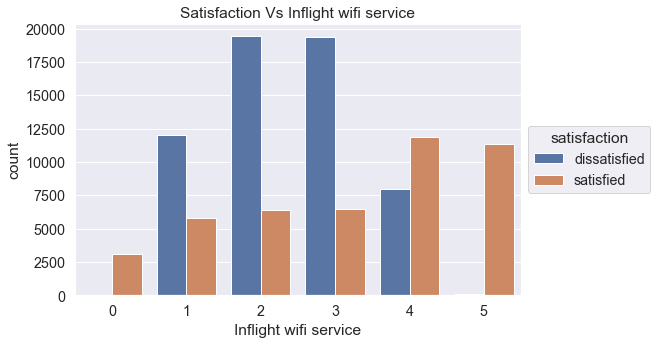

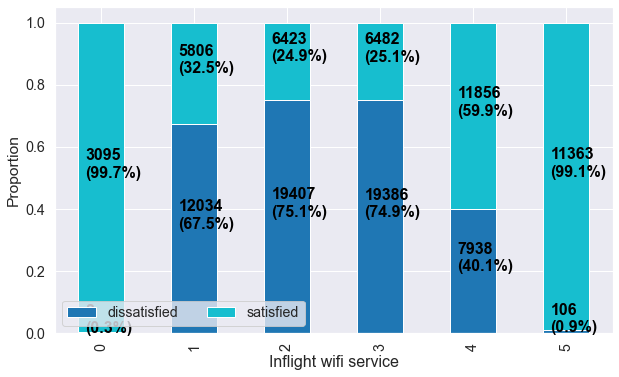

<AxesSubplot:>

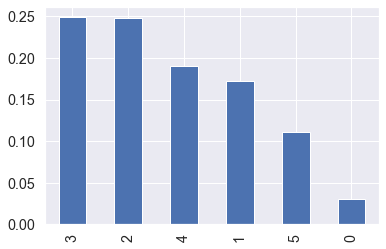

In [309]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Inflight wifi service", data = df, hue ="satisfaction")

# format graph
plt.title("Satisfaction Vs Inflight wifi service")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()
# calcuate dissatisfied_rate
analysis(df,'Inflight wifi service')
df['Inflight wifi service'].value_counts(normalize=True).plot(kind='bar')

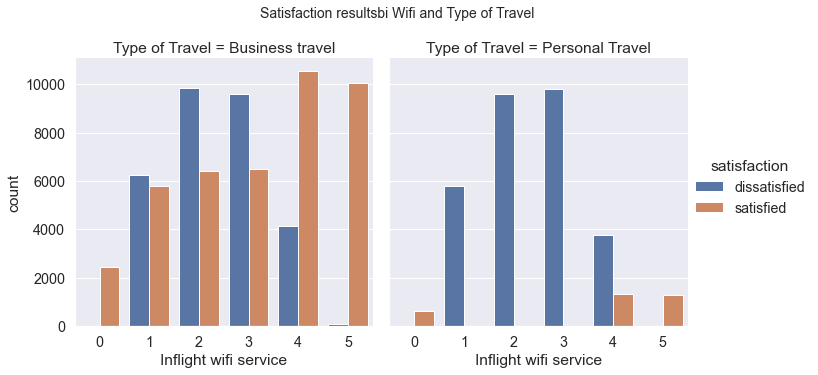

In [230]:
# create graph
sns.catplot( x ="Inflight wifi service", hue ="satisfaction", kind = "count", col = "Type of Travel", 
            data = df)
# format graph
plt.suptitle("Satisfaction resultsbi Wifi and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

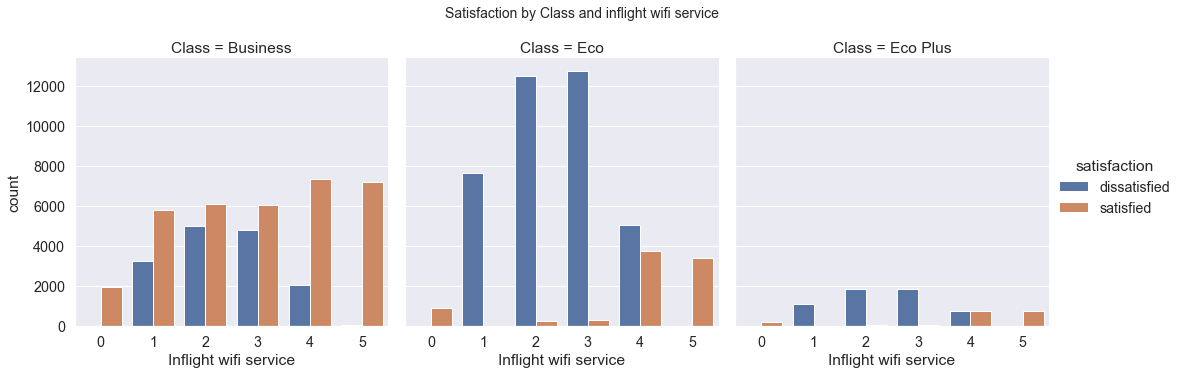

In [231]:
# create graph
sns.catplot( x ="Inflight wifi service", hue ="satisfaction", kind = "count", col = "Class", 
            data = df)
# format graph
plt.suptitle("Satisfaction by Class and inflight wifi service", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

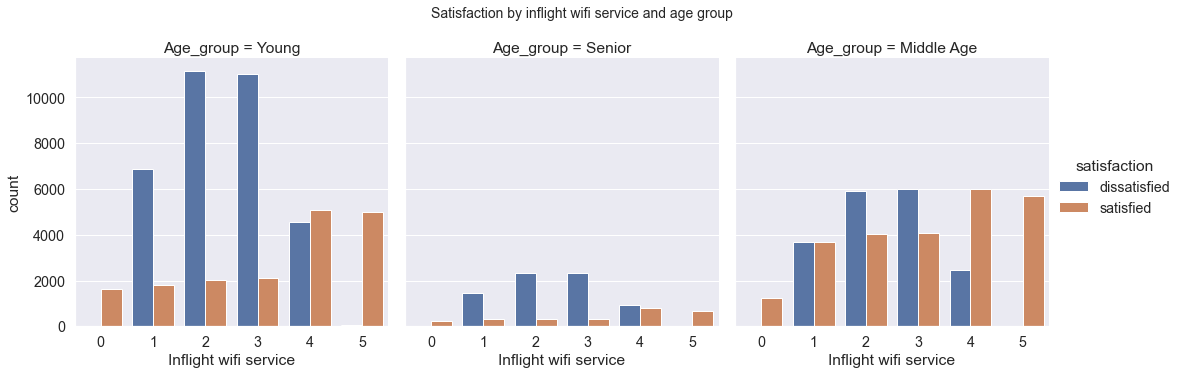

In [232]:
# create graph
sns.catplot( x ="Inflight wifi service", hue ="satisfaction", kind = "count", col = "Age_group", 
            data = df)

# format graph
plt.suptitle("Satisfaction by inflight wifi service and age group", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

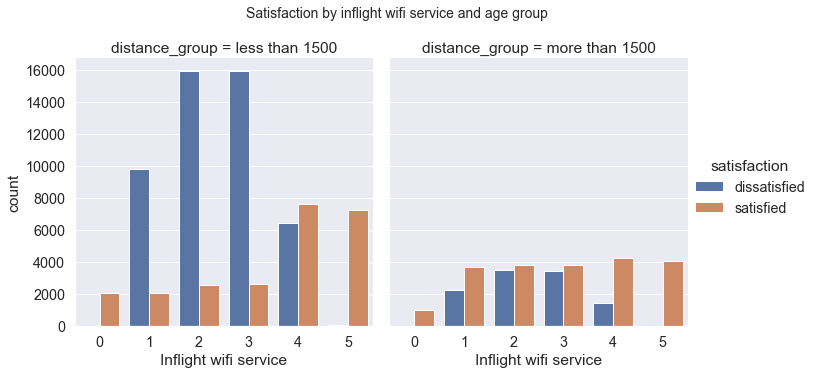

In [233]:
# create graph
sns.catplot( x ="Inflight wifi service", hue ="satisfaction", kind = "count", col = "distance_group", 
            data = df)

# format graph
plt.suptitle("Satisfaction by inflight wifi service and age group", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

# FLIGHT ENTERTAINMENT
 For flight entertainment, the trend is the same as before. The satisfaction rate increases as ratings increase from 1 to 5. When examining the stacked bar chart, it is evident that those who rated flight entertainment 1, 2, or 3 have a satisfaction rate below 30%. However, the satisfaction rate increases significantly to over 60% for those who rated the service 4 or 5. This suggests that moving from a rating of 3 to 4 is a crucial determinant of passenger satisfaction. 

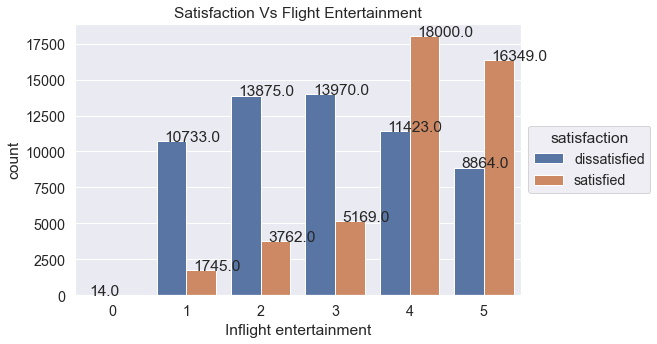

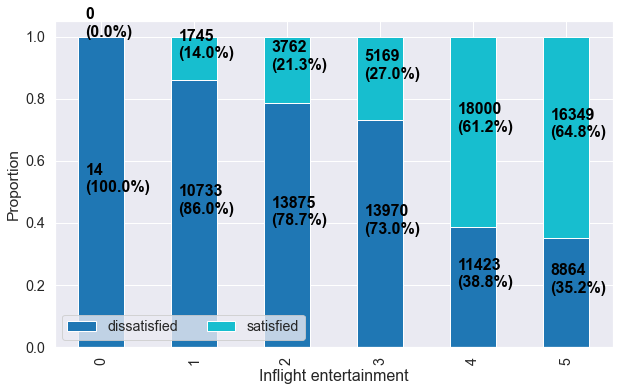

<AxesSubplot:>

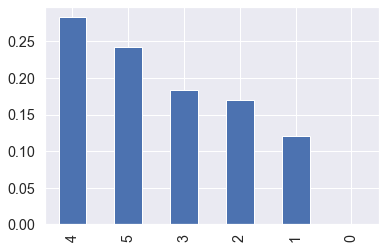

In [310]:
# create graph
plt.figure(figsize = (8,5))
ax = sns.countplot(x ="Inflight entertainment", data = df, hue ="satisfaction")

# show numbers above the bars
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
    
# format graph
plt.title("Satisfaction Vs Flight Entertainment")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

# dissatisfied rate
analysis(df,"Inflight entertainment")

df['Inflight entertainment'].value_counts(normalize=True).plot(kind = 'bar')

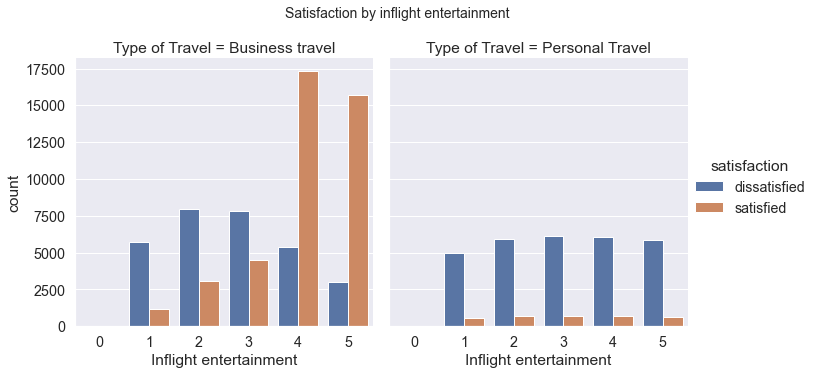

In [235]:
# create graph
sns.catplot( x ="Inflight entertainment", hue ="satisfaction", kind = "count", col = "Type of Travel", 
            data = df)
# format graph
plt.suptitle("Satisfaction by inflight entertainment", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

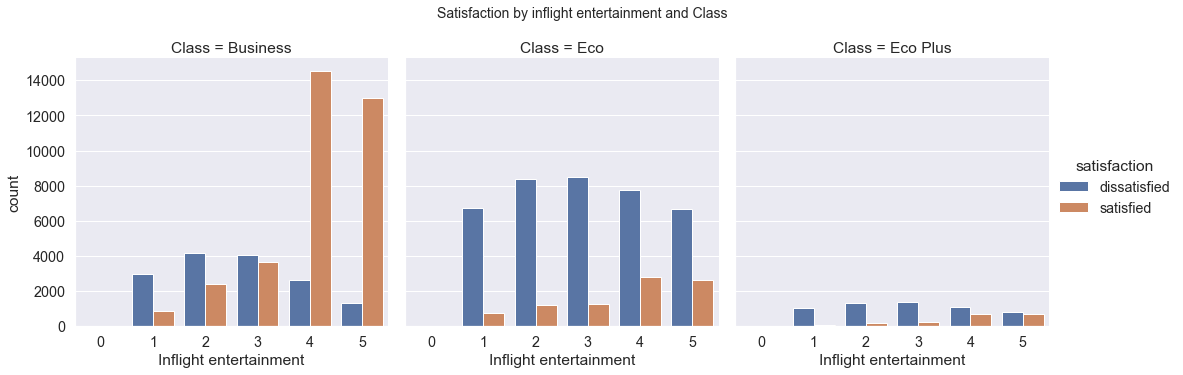

In [236]:
# create graph
sns.catplot( x ="Inflight entertainment", hue ="satisfaction", kind = "count", col = "Class", 
            data = df)
# format graph
plt.suptitle("Satisfaction by inflight entertainment and Class", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

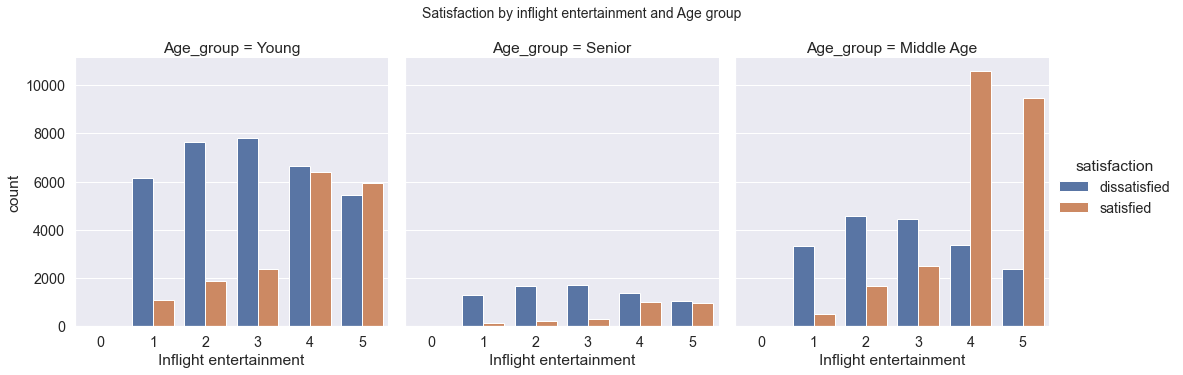

In [237]:
# create graph
sns.catplot( x ="Inflight entertainment", hue ="satisfaction", kind = "count", col = "Age_group", 
            data = df)
# format graph
plt.suptitle("Satisfaction by inflight entertainment and Age group", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

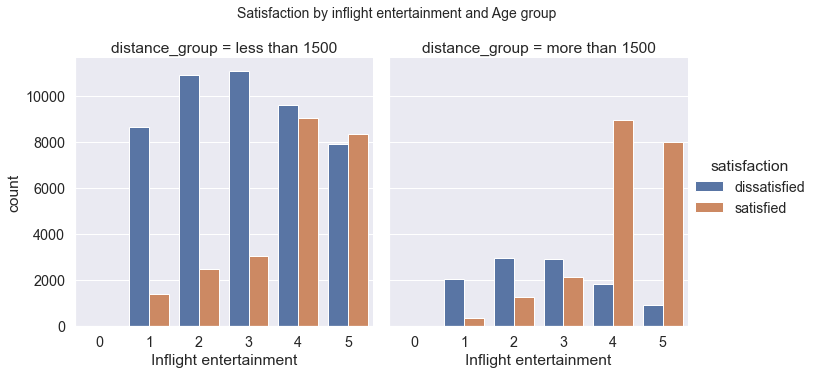

In [238]:
# create graph
sns.catplot( x ="Inflight entertainment", hue ="satisfaction", kind = "count", col = "distance_group", 
 data = df)
# format graph
plt.suptitle("Satisfaction by inflight entertainment and Age group", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

By looking at the figures we can see that The satisfaction rate for online boarding, Wi-Fi, and inflight entertainment increases as ratings increase from 1 to 5. Ratings of 3 seem to be a turning point for customer satisfaction, with a significant increase in satisfaction rate as ratings move from 3 to 4 or 5. It is also notable that almost 100% of those who rated the Wi-Fi service 5 are satisfied with it. 

# Bivariant Analysis 

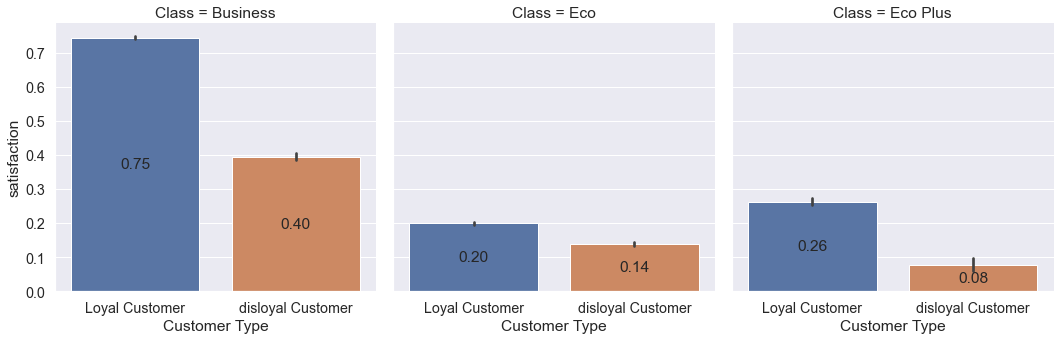

In [239]:

df.replace(to_replace ='satisfied', value = 1, inplace=True)
df.replace(to_replace='dissatisfied', value= 0, inplace=True)

sns.set(font_scale=1.3)
g = sns.catplot(x="Customer Type", y="satisfaction", col="Class", data=df, kind="bar")

# loop over the three different axes crated by the col feature
for i in range(3):
    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, i)

    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

plt.show()



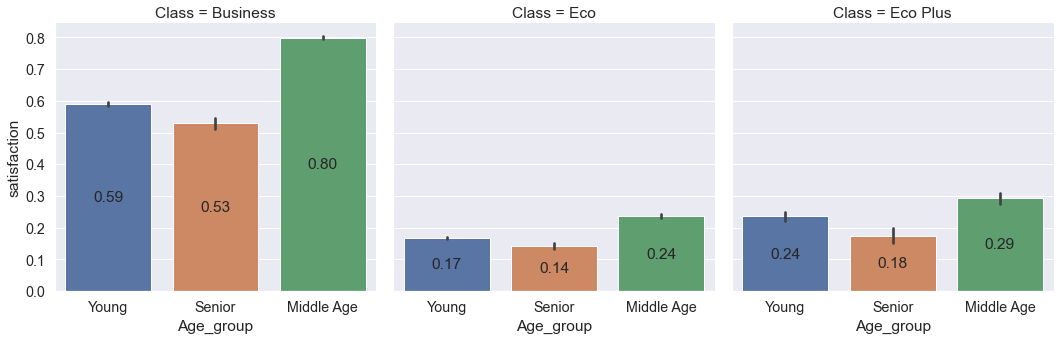

In [240]:
sns.set(font_scale=1.3)
g = sns.catplot(x="Age_group", y="satisfaction", col="Class", data=df, kind="bar")

# loop over the three different axes crated by the col feature
for i in range(3):
    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, i)

    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

plt.show()

# Cheking outliers and noise in our data 

we can use box plots to easly identify the features that have outliers.

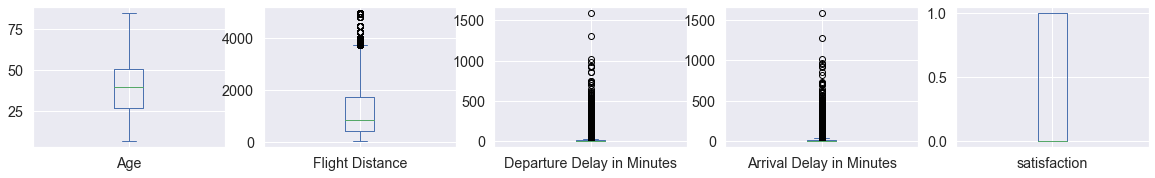

In [247]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

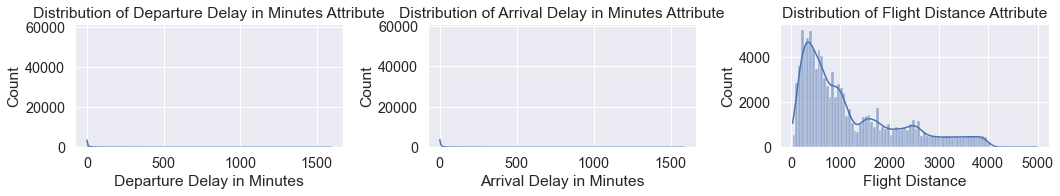

In [248]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df[['Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance']],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Attribute")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

<br><br><br><br><br>




## Cheking Null Values :




In [54]:
df.isnull().sum() 

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
Age_group                              0
distance_group  

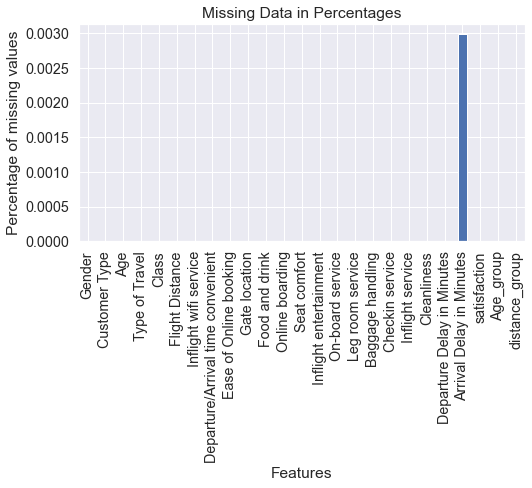

In [55]:
# Checking for NULLs in the data
df.isnull().mean().plot.bar(figsize=(8,4)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

- we can sse that only Arrival Delay Minutes has 393 values. this is very small compare to the size of our data, therefore we can drop them. 

# Finding an answer for third research question
To increase the overall satisfaction rate, the airline should be equipped with a reliable strategy. One approach could be to use a machine learning model to identify which services should be prioritized for improvement. This way, the airline can avoid wasting resources on services that have a minimal impact on the satisfaction rate and focus on important services to see effective changes in the customer experience. 

Additionally, we can create subsets of data based on different groups (with a focus on groups with the highest dissatisfaction rate). By fitting a machine learning model to each of these subsets, we can identify the most important features in terms of satisfaction rate. This way, the airline can prioritize improvements for key features if it wants to focus on improving only for a specific group. 

To perform this stage of analysis, we will use a random forest model and the Sklearn Python library. A random forest is a set of decision trees with internal nodes and leaves. The selected feature for the internal node is used to split the data. By using the Gini importance, we can measure how each feature contributes to reducing impurity for a split. The feature with the highest decrease in impurity will be selected for the internal node. We can compute the average decrease in impurity for each variable and collect the measure of feature importance by averaging over all trees in our random forest machine learning model [5]. The feature with the highest importance will do the best job of splitting the data with the lowest Gini impurity value. This method is available in the scikit-learn implementation of the Random Forest.



              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14528
         1.0       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



Text(0.5, 0, 'Random Forest Feature Importance')

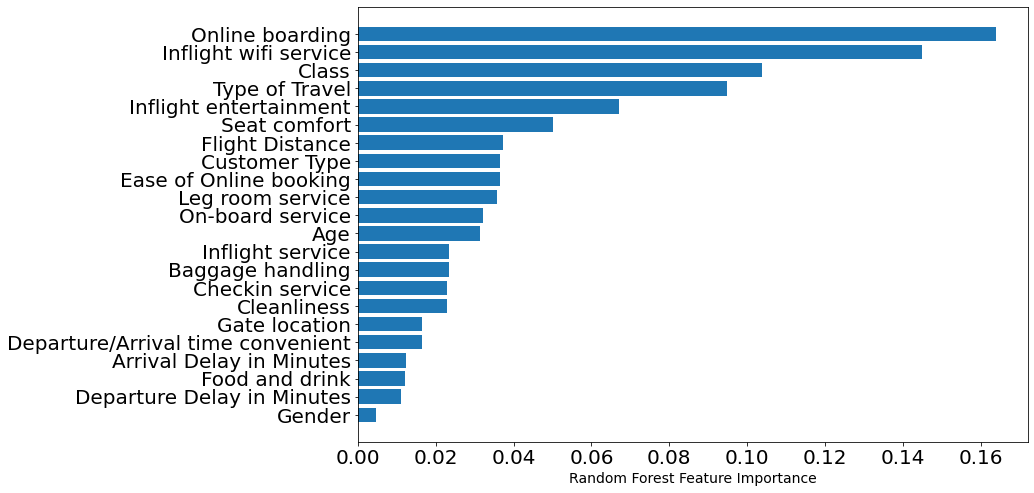

In [9]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/


# Answer for our third research question
To increase the overall satisfaction rate, the airline should be equipped with a reliable strategy. We can, also, use a random forest model to find the most important service features regarding customer satisfaction. The feature with the highest importance will do the best job of splitting the data with the lowest Gini impurity value[5].

Figures shows that online boarding, inflight Wi-Fi service, class, type of travel, and inflight entertainment are the top five important features. Interestingly, our prior analysis of service features indicated that online boarding, inflight Wi-Fi service, and inflight entertainment were the most important factors for customer satisfaction, and our model appears to validate these findings. With a reasonably high accuracy of 96%, we can rely on this model for decision making.

In the final stage of our analysis, we focus on two groups of customers with high dissatisfaction rates: young customers (aged under 40) and those who traveled in Eco class. We trained a random forest model on these groups. We can see similar results for these groups. The top important features are online boarding, inflight Wi-Fi service, and ease of online booking. This indicates the importance of improving online services for airlines to increase customer satisfaction.


# Only Service features 

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     14528
         1.0       0.95      0.92      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.94      0.94     25893
weighted avg       0.95      0.95      0.95     25893



Text(0.5, 0, 'Random Forest Feature Importance')

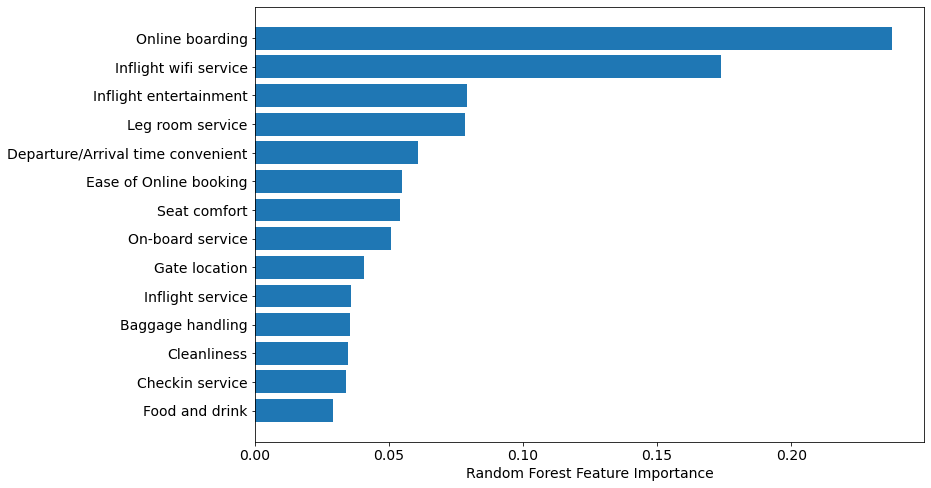

In [10]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/


# Imporovement in Different Classes
## Eco Class

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      9293
         1.0       0.89      0.76      0.82      2231

    accuracy                           0.93     11524
   macro avg       0.91      0.87      0.89     11524
weighted avg       0.93      0.93      0.93     11524



Text(0.5, 0, 'Random Forest Feature Importance')

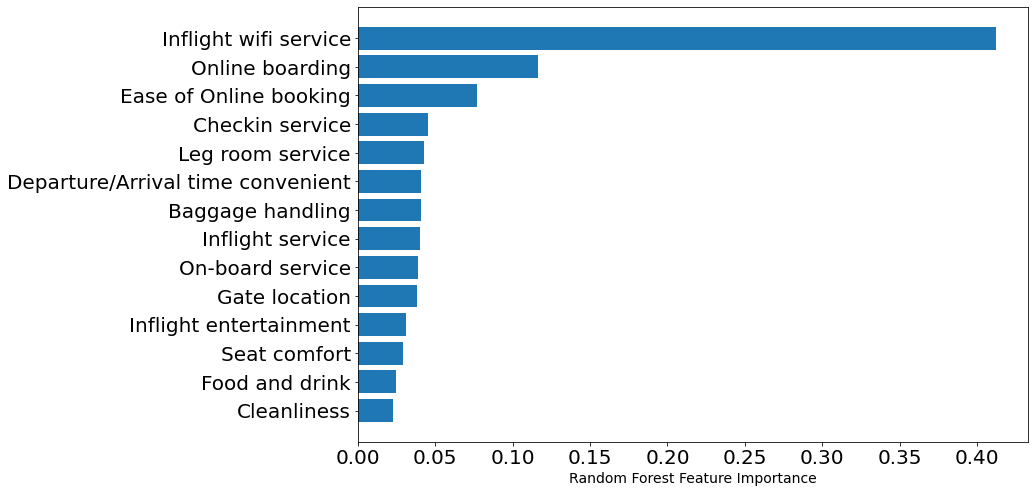

In [17]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# assigning traini data set to Eco class
train = train[train['Class']=='Eco']
test = test[test['Class']=='Eco']

plt.tick_params(axis='both', which='major', labelsize=20)
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/

## business 

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      3797
         1.0       0.97      0.98      0.98      8660

    accuracy                           0.97     12457
   macro avg       0.96      0.96      0.96     12457
weighted avg       0.97      0.97      0.97     12457



Text(0.5, 0, 'Random Forest Feature Importance')

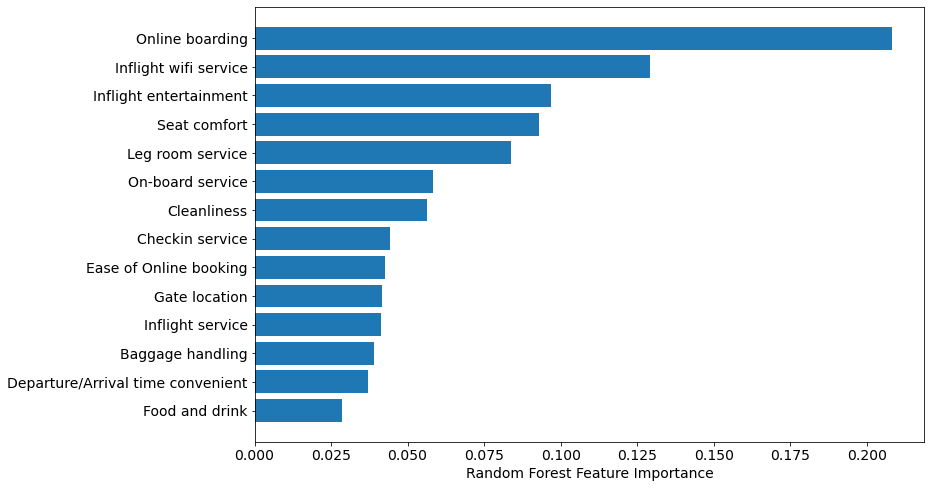

In [12]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# assigning traini data set to Eco class

train = train[train['Class']=='Business']
test = test[test['Class']=='Business']

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/

# imporovment for different age groups 
## Young

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      8148
         1.0       0.93      0.89      0.91      4487

    accuracy                           0.94     12635
   macro avg       0.94      0.93      0.93     12635
weighted avg       0.94      0.94      0.94     12635



Text(0.5, 0, 'Random Forest Feature Importance')

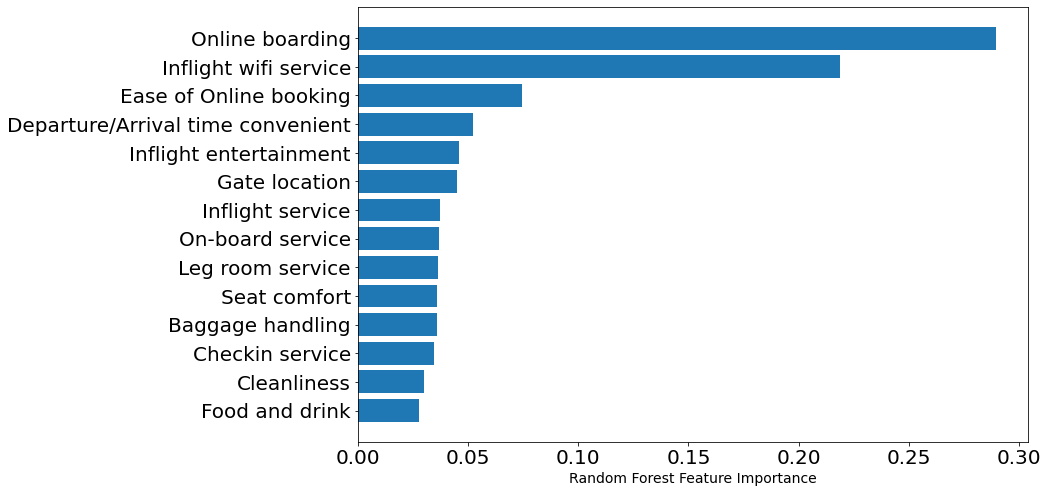

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# assigning traini data set to Eco class

def age_group (row): 
    if row <40:
        return 'Young'
    if (row>=40) & (row<60):
        return "Middle Age"
    if row >=60:
        return "Senior"
    else:
        return "no age"
    
train["Age_group"] = train["Age"].apply(lambda row: age_group(row))
test["Age_group"] = test["Age"].apply(lambda row: age_group(row))



train = train[train['Age_group']=='Young']
test = test[test['Age_group']=='Young']

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})



def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Age_group','Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/

# Middle Age

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      4563
         1.0       0.96      0.95      0.96      6209

    accuracy                           0.95     10772
   macro avg       0.95      0.95      0.95     10772
weighted avg       0.95      0.95      0.95     10772



Text(0.5, 0, 'Random Forest Feature Importance')

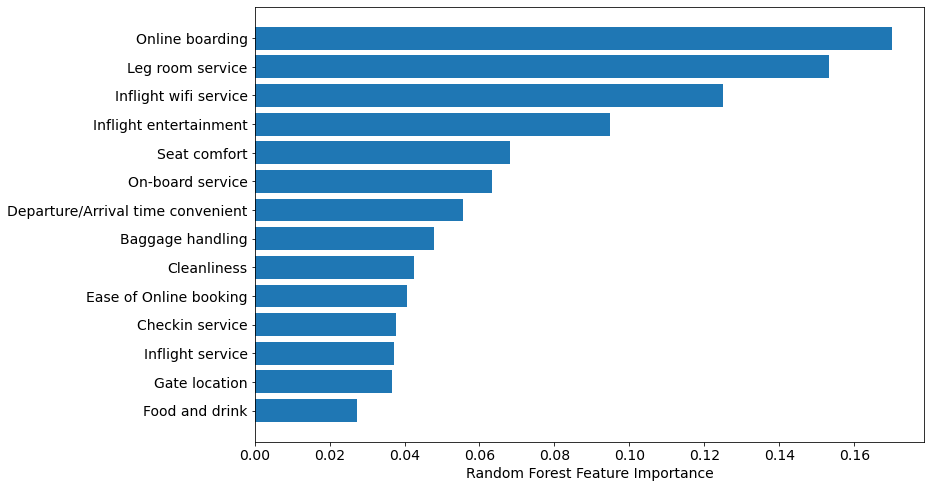

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# assigning traini data set to Eco class

def age_group (row): 
    if row <40:
        return 'Young'
    if (row>=40) & (row<60):
        return "Middle Age"
    if row >=60:
        return "Senior"
    else:
        return "no age"
    
train["Age_group"] = train["Age"].apply(lambda row: age_group(row))
test["Age_group"] = test["Age"].apply(lambda row: age_group(row))



train = train[train['Age_group']=='Middle Age']
test = test[test['Age_group']=='Middle Age']

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})



def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Age_group','Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Improvment in Type of Travel 
## personal

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      7121
         1.0       0.88      0.62      0.73       792

    accuracy                           0.95      7913
   macro avg       0.92      0.81      0.85      7913
weighted avg       0.95      0.95      0.95      7913



Text(0.5, 0, 'Random Forest Feature Importance')

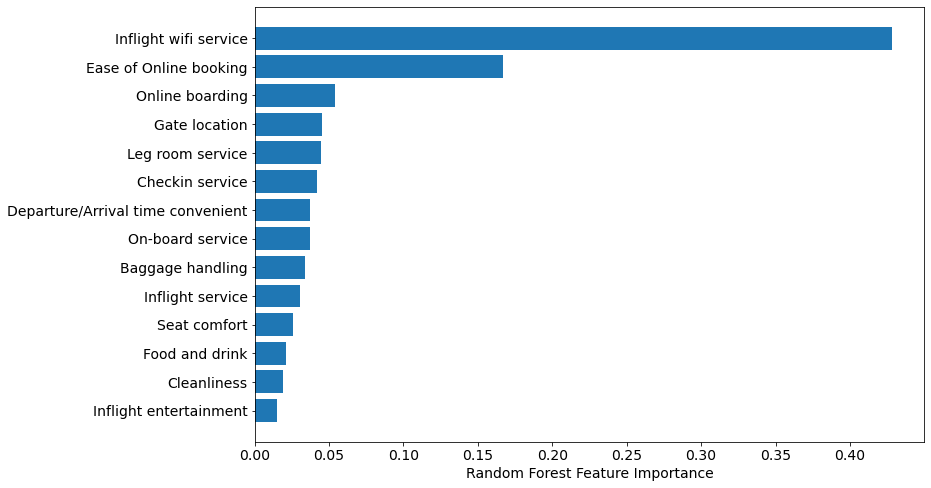

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# filttering datasets
train = train[train['Type of Travel']=='Personal Travel']
test = test[test['Type of Travel']=='Personal Travel']

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/

## Business travel

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      7407
         1.0       0.96      0.96      0.96     10573

    accuracy                           0.95     17980
   macro avg       0.95      0.95      0.95     17980
weighted avg       0.95      0.95      0.95     17980



Text(0.5, 0, 'Random Forest Feature Importance')

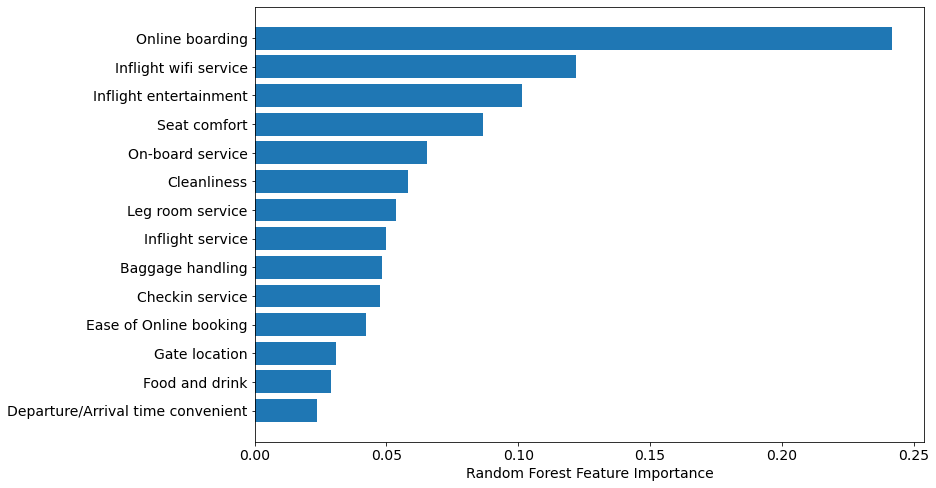

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# filttering datasets
train = train[train['Type of Travel']=='Business travel']
test = test[test['Type of Travel']=='Business travel']

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

def process_data(df):
    df.dropna(inplace = True)
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    enc = OrdinalEncoder()
    enc.fit(df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']])
    df[['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']] =enc.transform(df[['Gender','Customer Type', 'Type of Travel','Class','satisfaction']])
    df.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel',
         'Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1,inplace=True)

    return df
df_train = process_data(train)
df_test = process_data(test)


# split the training and test dataset to the input features (x_train, x_test) and the survival class (y_train)
y_train = df_train['satisfaction']
x_train = df_train.drop(['satisfaction'], axis=1)

y_test =df_test['satisfaction']
x_test = df_test.drop(['satisfaction'],axis=1)


#model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#result
print(classification_report(y_test,y_pred))

# feature importance
colname = np.array(list(train.columns))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(colname[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
#code credit https://mljar.com/blog/feature-importance-in-random-forest/

# Refrences

- 1) Eboli, L. and G. Mazzulla, An ordinal logistic regression model for analysing airport passenger satisfaction. EuroMed Journal of Business, 2009.

- 2) Andrienko, N., et al., Visual analytics for data scientists. 2020: Springer
- 3) Muralidhar, K. 100% stacked charts in Python. 2021; Available from: https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
- 4) Chris, D.s.w. Kaggle Titanic – Data Analysis. Available from: https://datasciencewithchris.com/kaggle-titanic-data-analysis/.
- 5) Płoński, P. Random Forest Feature Importance Computed in 3 Ways with Python. 2020; Available from: https://mljar.com/blog/feature-importance-in-random-forest/.